## <font color="blue"> Combine Data Cleaning, Feature Selection, Modeling and Interpretability </font>

Data analysis and machine learning entail crucial stages such as data cleaning, feature selection, modeling, and interpretability.

* **Data cleaning** is the process of identifying and rectifying errors in the data, including missing values, outliers, and inconsistencies, to ensure accuracy and reliability.

* **Feature selection** involves pinpointing the most relevant features related to the target variable, reducing data dimensionality, and enhancing model performance.

* **Modeling** entails choosing a suitable algorithm or model to train and assess the cleaned data and selected features, resulting in a predictive model.

* **Interpretability** is the understanding of how the model generates predictions, achieved through examining coefficients, decision trees, or other features. This fosters trust in the model and facilitates informed decision-making.

> Integrating these steps empowers data practitioners to construct accurate, efficient, and interpretable models, enabling informed and reliable decisions based on analyzed data.

### What is the ultimate goal we intend to achieve with this notebook?

Our primary objective is to develop a machine learning model capable of predicting whether an individual survived the Titanic shipwreck, utilizing specific parameters. Prior to model creation, it is imperative to perform data cleaning, feature selection, and exploratory data analysis on the Kaggle dataset.

Kaggle Dataset Link: https://www.kaggle.com/datasets/yasserh/titanic-dataset

The following provides a breakdown of typical fields within the dataset:

* **Passenger Information**:
This segment encompasses data about passengers, such as their names, gender, age, and passenger class (First, Second, or Third Class), offering insights into the demographic composition of the onboard passengers.

* **Ticket Information**:
Details about ticket numbers, fares paid, and cabin information fall under this category, enabling analysis of patterns related to ticket prices and cabin locations.

* **Travel Details**:
This section provides information about passengers' travel arrangements, including the port of embarkation (Cherbourg, Queenstown, or Southampton) and the destination of the journey.

* **Family Relationships**:
Data about family relationships includes the number of siblings/spouses (SibSp) and the number of parents/children (Parch) a passenger was traveling with, facilitating the analysis of family groups on board.

* **Survival Status**:
The survival status field indicates whether a passenger survived the Titanic disaster, represented as a binary variable (1 for survived, 0 for did not survive). This field serves as the target variable for prediction models.

* **Other Relevant Factors**:
Additional fields may capture relevant factors potentially affecting survival rates, such as passenger ID, lifeboat numbers (if applicable), and special circumstances related to a passenger's survival.

> The Titanic Survival dataset is commonly employed as a training dataset for classification and predictive modeling tasks. Researchers and data scientists leverage this dataset to explore patterns and factors influencing the survival rates of Titanic passengers, providing insights into demographics, socio-economic factors, and survival strategies during the shipwreck.

## FLOW

1. Load data: Installing all the dependencies and required libraries

2. Reviewing and Examining the data

3. Data Cleaning

4. Data modeling, prediction and solving

5. Supervised Learning techniques

6. Fit linear model and interpret regression techniques

7. Feature Selection and Classification

8. AutoML

9. Model Interpretability

10. Questions Answered

11. Learnings & Conclusion

12. License

13. References

## <font color="FF6600"> Installing all the dependencies and required libraries</font>

**matplotlib:** Matplotlib is a Python plotting library that enables the creation of static, animated, and interactive visualizations. It offers a range of plot types such as line, scatter, bar, histogram, and more, making it a versatile tool for data visualization and analysis.



**numpy:** NumPy, short for Numerical Python, is a foundational library for numerical computing in Python. It features a high-performance multidimensional array object and tools for working with these arrays, facilitating efficient mathematical operations on large datasets. NumPy supports linear algebra, Fourier analysis, and various other mathematical functions.



**pandas:** Pandas is an open-source library that provides high-performance, user-friendly data structures and tools for data analysis in Python. It introduces two primary data structures: the Series (1-dimensional) and DataFrame (2-dimensional), handling diverse data manipulation tasks, including handling missing data, reshaping, merging, and filtering.



**sklearn:** Scikit-learn, often abbreviated as sklearn, is a Python machine learning library that offers straightforward and efficient tools for data mining and analysis. It encompasses various algorithms for classification, regression, clustering, dimensionality reduction, model selection, as well as preprocessing and model evaluation tools.



**scipy:** SciPy, built on NumPy, extends functionality for scientific and technical computing in Python. It includes modules for optimization, integration, interpolation, eigenvalue problems, and more, catering to a broad range of scientific applications.



**statsmodels:** Statsmodels is a Python library designed for statistical modeling, hypothesis testing, and data exploration. It provides classes and functions for estimating diverse statistical models, conducting statistical tests, and supporting methods like linear regression, generalized linear models, and time series analysis.



**category-encoders:** Category Encoders is a library compatible with scikit-learn that offers transformers for encoding categorical variables into numerical representations suitable for machine learning algorithms. It includes techniques like one-hot encoding, target encoding, ordinal encoding, and more.



**h2o:** H2O is an open-source, scalable machine learning platform supporting various algorithms for supervised and unsupervised learning. It provides a Python API for seamless integration and features like AutoML, automating the training and tuning process of machine learning models.



**sklearn.ensemble:** Sklearn.ensemble is a submodule of scikit-learn, focusing on ensemble learning methods. Ensemble learning combines multiple models to enhance predictive performance, featuring algorithms such as RandomForest, Gradient Boosting, AdaBoost, and others.



**shap:** SHAP (SHapley Additive exPlanations) is a library utilizing game-theoretic principles to explain machine learning model outputs. It offers a unified measure of feature importance across different models, facilitating better interpretability and understanding of complex model decision-making processes.

In [ ]:
!pip install gender_guesser
!pip install wordcloud
!pip install mlxtend
!pip install eli5
!pip install requests
!pip install tabulate
!pip install "colorama>=0.3.8"
!pip install future
!pip install h2o
!pip install shap

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn import metrics
from sklearn.preprocessing import LabelEncoder

import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

## <font color="FF6600"> Reviewing and examining data </font>

In [ ]:
# fetch dataset
dataset = pd.read_csv('https://raw.githubusercontent.com/RakshitaJ-Neu/info6105-dataset/main/Titanic-Dataset.csv')
dataset.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
# features available in the dataset
dataset.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
dataset['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [ ]:
dataset.shape

(891, 12)

## <font color="FF6600"> Data Cleaning </font>
**Missing values**

In [ ]:
df = dataset.copy() #dataframe copy
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [ ]:
# using this we can replace null values with the mean of age column
int(dataset['Age'].mean())

29

In [ ]:
#all null values of Age, Embarked and Cabin column replace with the mean, mode of the column
df['Age'] = df['Age'].fillna(np.mean(df['Age']))
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)
df['Cabin'].fillna(df['Cabin'].mode()[0], inplace=True)
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

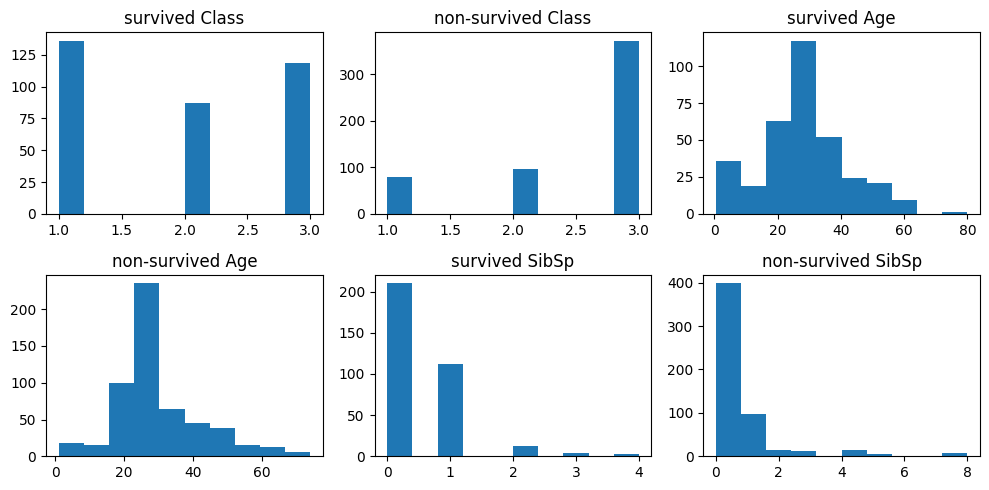

In [ ]:
# Analysing Relationship between all variables
# Create a subplot with 1 row and 2 columns
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(10, 5))

axes[0][0].hist(df[df.Survived == 1]['Pclass'])
axes[0][0].set_title('survived Class')

axes[0][1].hist(df[df.Survived != 1]['Pclass'])
axes[0][1].set_title('non-survived Class')

axes[0][2].hist(df[df.Survived == 1]['Age'])
axes[0][2].set_title('survived Age')

axes[1][0].hist(df[df.Survived != 1]['Age'])
axes[1][0].set_title('non-survived Age')

axes[1][1].hist(df[df.Survived == 1]['SibSp'])
axes[1][1].set_title('survived SibSp')

axes[1][2].hist(df[df.Survived != 1]['SibSp'])
axes[1][2].set_title('non-survived SibSp')

plt.tight_layout()
plt.show()

<Figure size 1000x500 with 0 Axes>

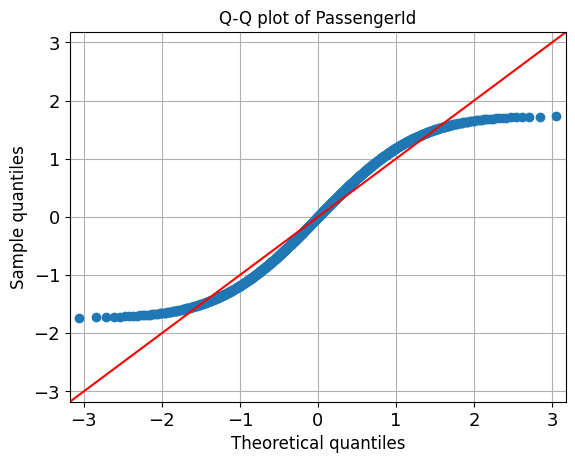

<Figure size 1000x500 with 0 Axes>

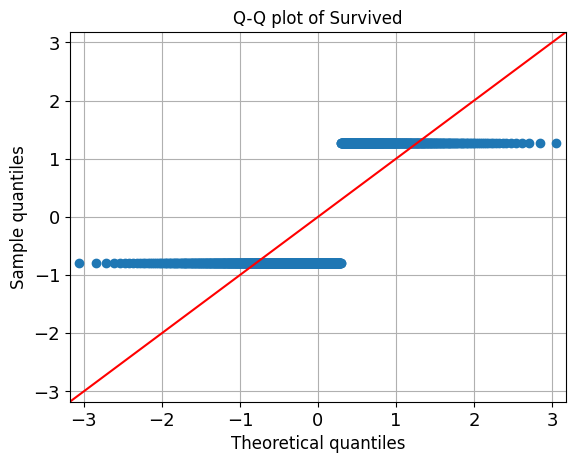

<Figure size 1000x500 with 0 Axes>

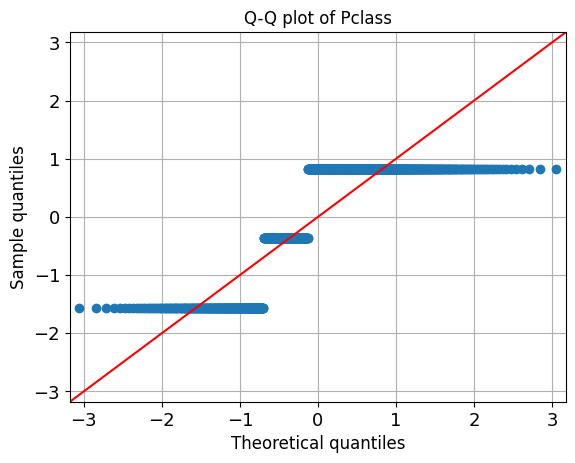

<Figure size 1000x500 with 0 Axes>

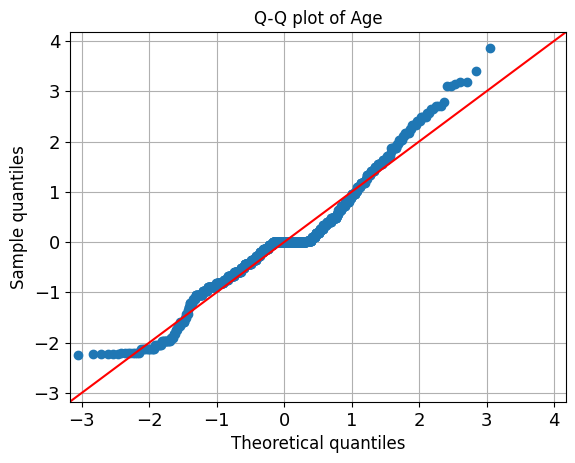

<Figure size 1000x500 with 0 Axes>

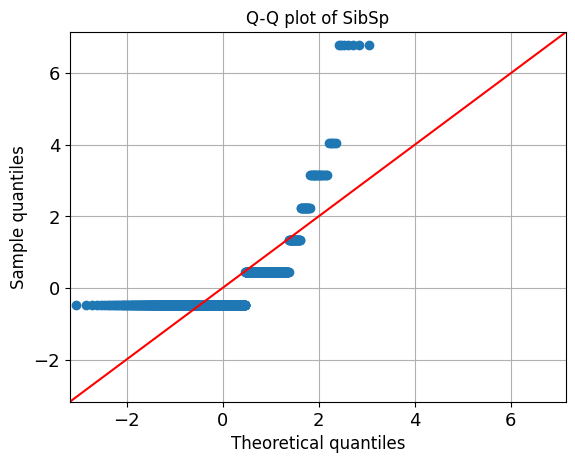

<Figure size 1000x500 with 0 Axes>

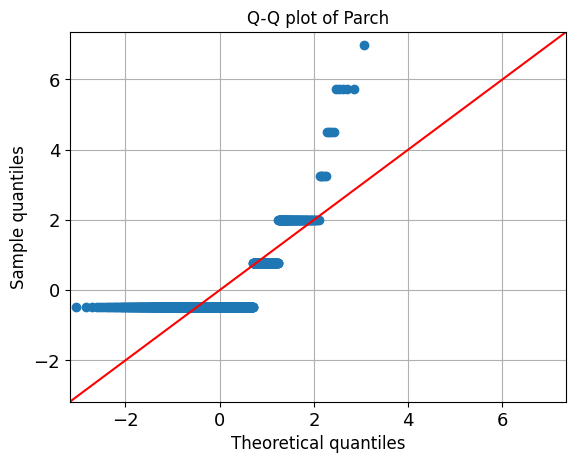

<Figure size 1000x500 with 0 Axes>

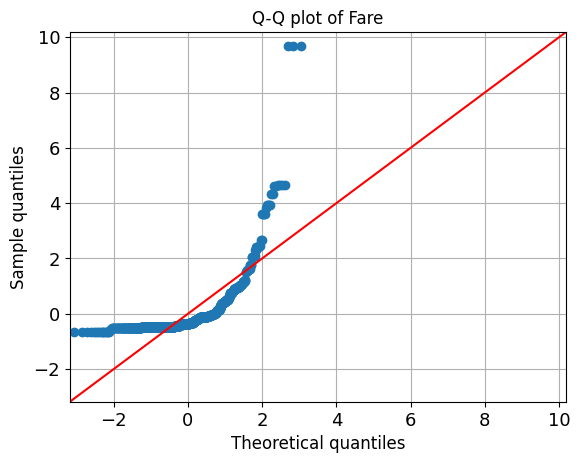

In [ ]:
# Q-Q PLOT for independent variables
from statsmodels.graphics.gofplots import qqplot
data_features = df[
["PassengerId", "Survived", "Pclass", "Age", "SibSp", "Parch", "Fare"]
]
for c in data_features.columns[:]:
    plt.figure(figsize=(10, 5))
    fig = qqplot(data_features[c], line="45", fit="True")
    plt.xticks(fontsize=13)
    plt.yticks(fontsize=13)
    plt.xlabel("Theoretical quantiles", fontsize=12)
    plt.ylabel("Sample quantiles", fontsize=12)
    plt.title("Q-Q plot of {}".format(c), fontsize=12)
    plt.grid(True)
    plt.show()

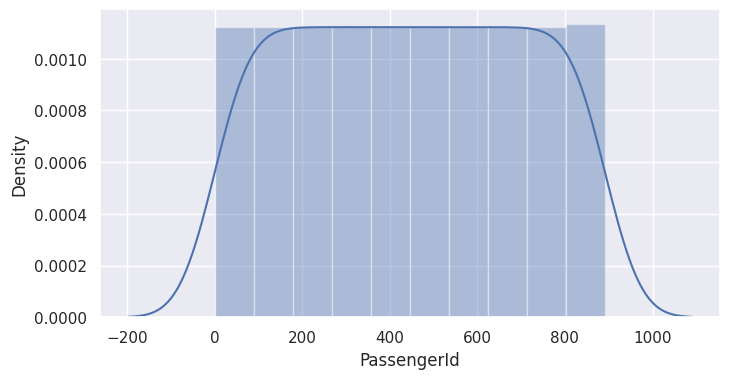

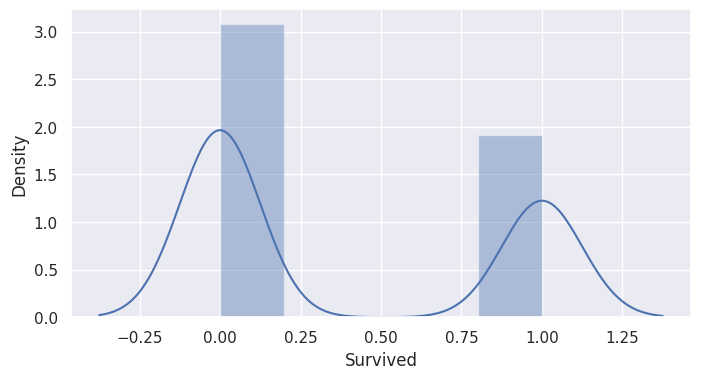

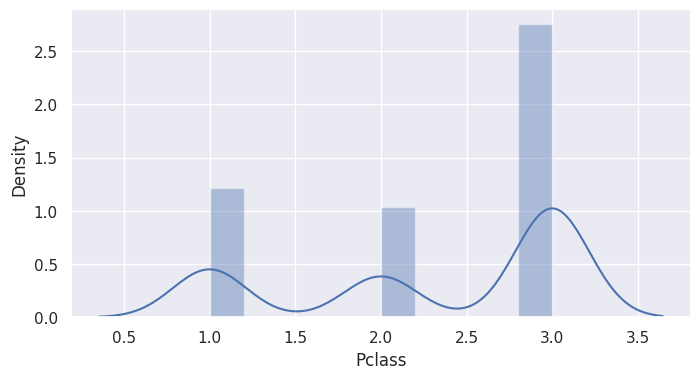

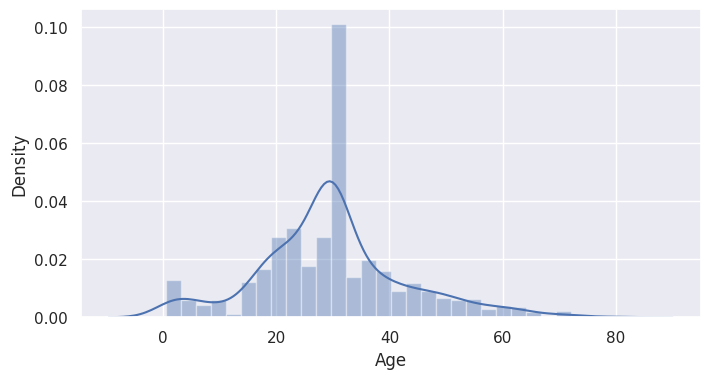

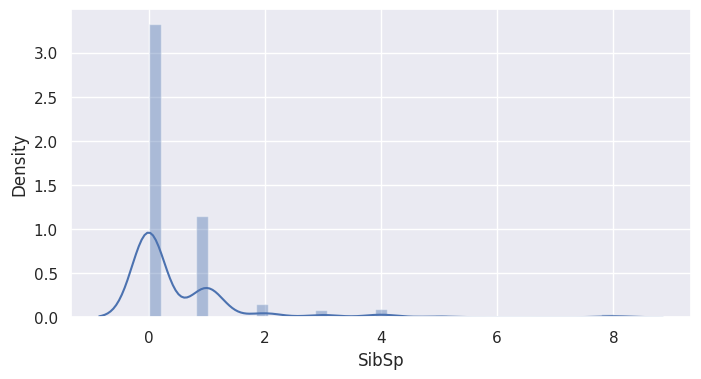

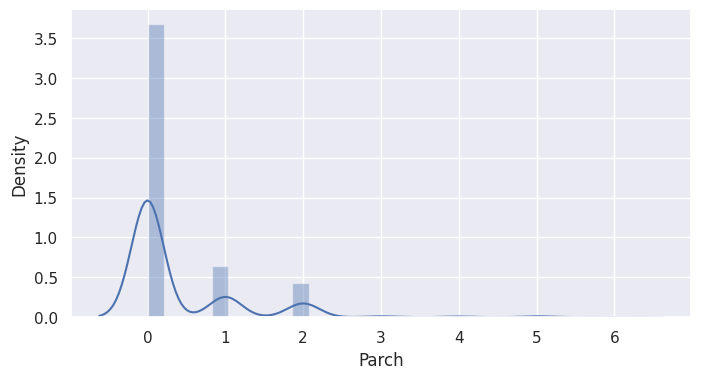

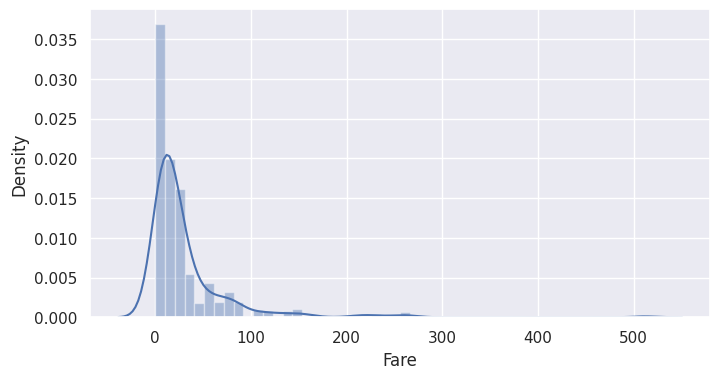

In [ ]:
# sns plots
for column in (df[["PassengerId", "Survived", "Pclass", "Age", "SibSp", "Parch", "Fare"]]):
    sns.set(rc={"figure.figsize": (8, 4)});
    sns.distplot(df[column])
    plt.show()

<Figure size 2000x700 with 0 Axes>

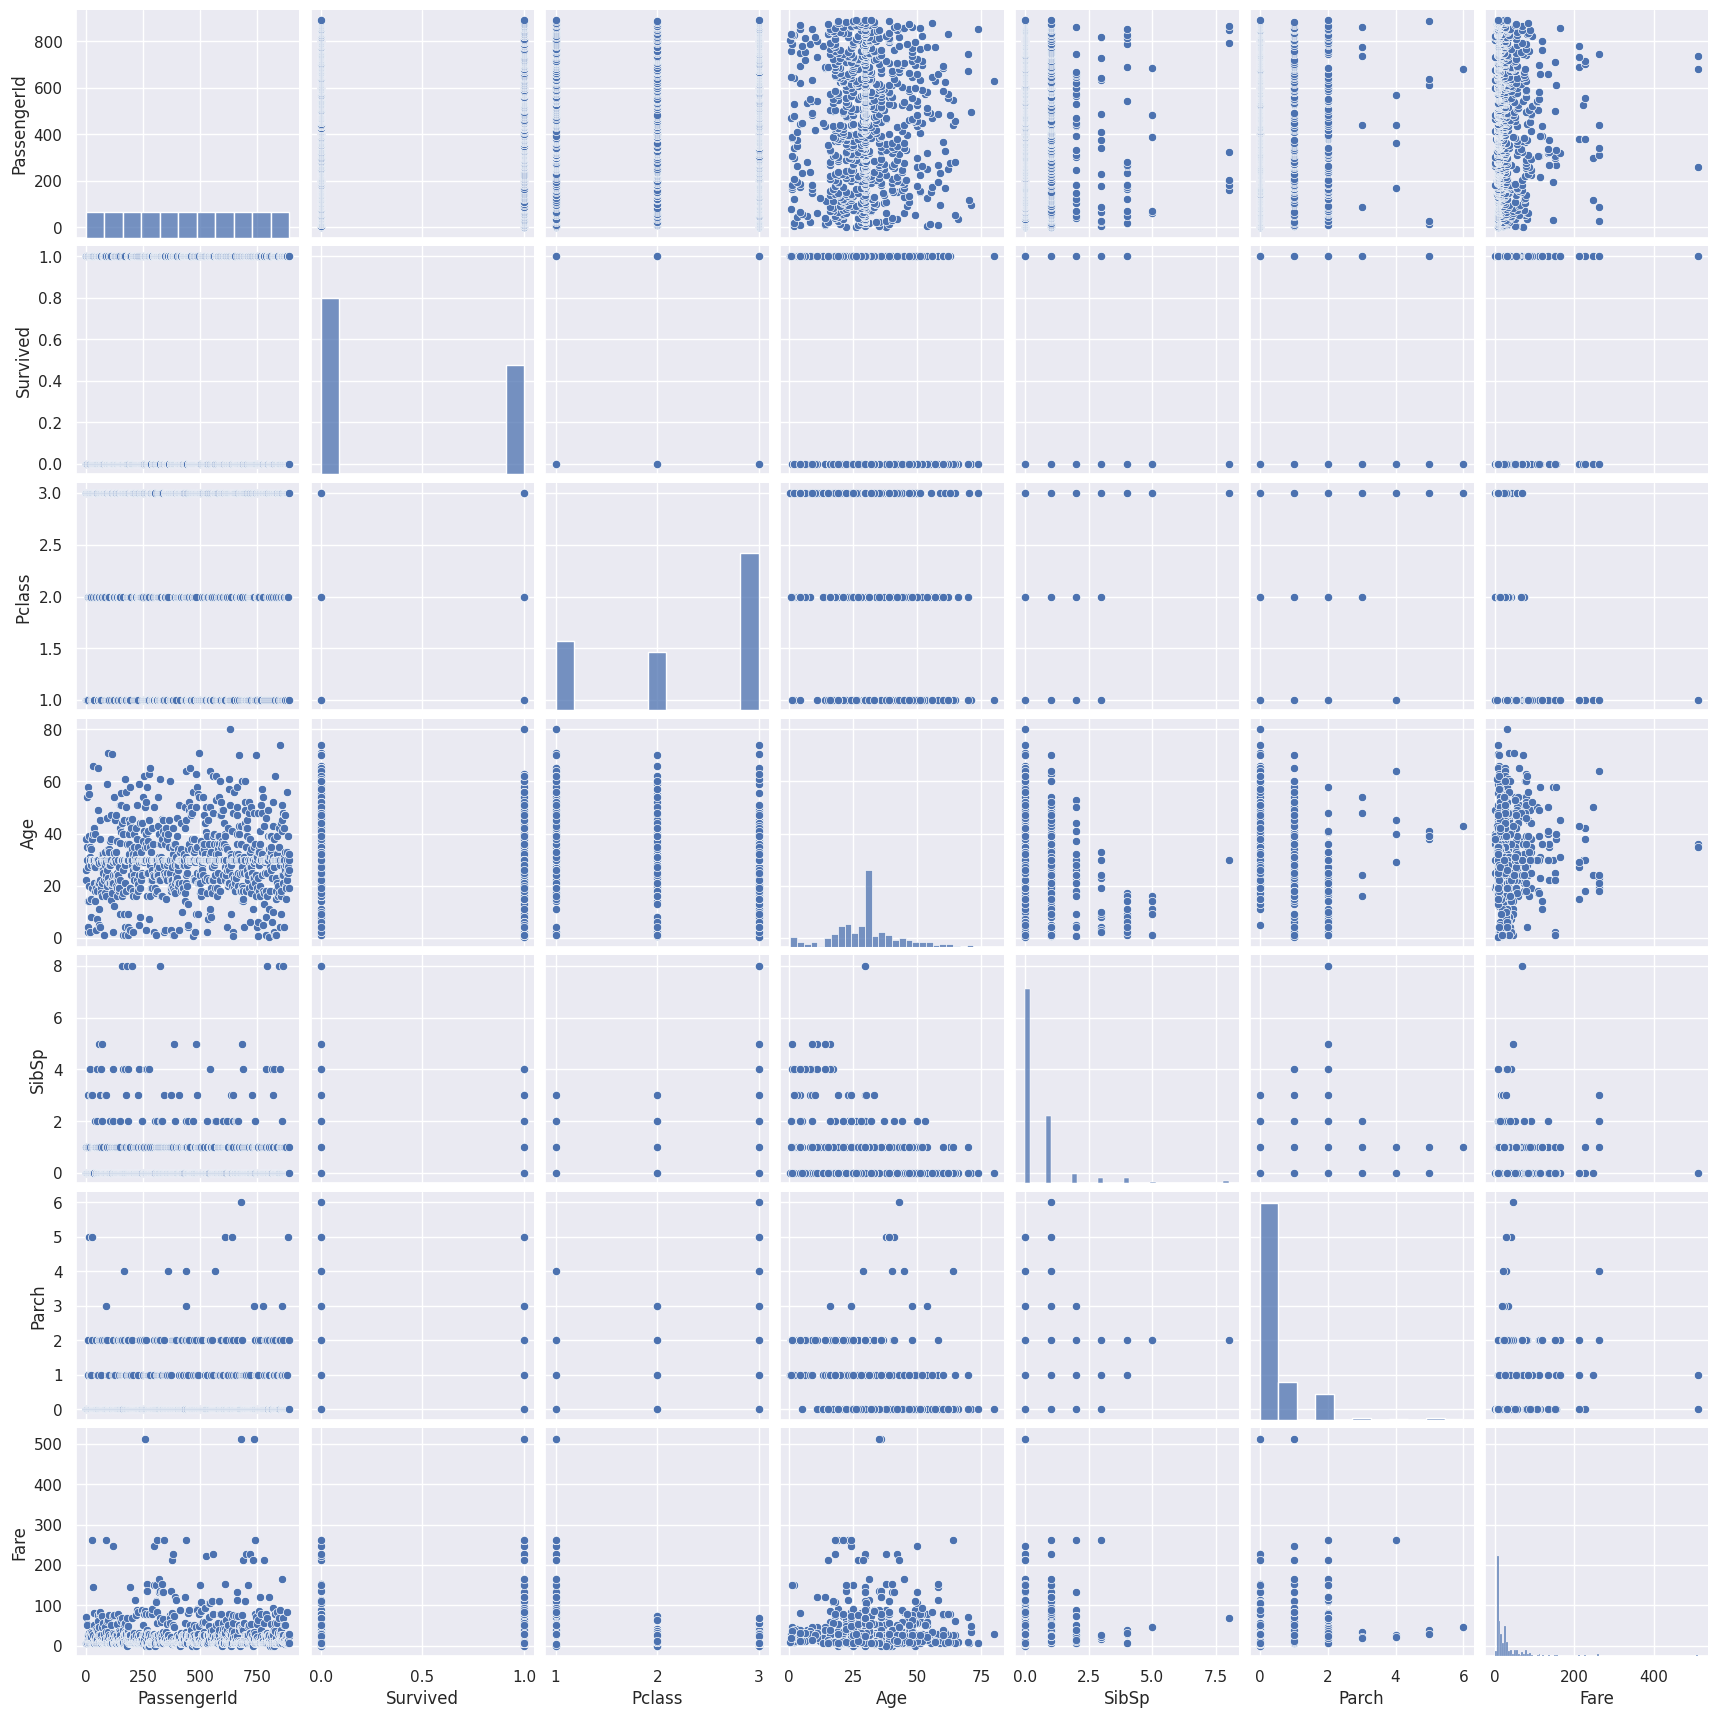

In [ ]:
plt.figure(figsize=(20,7))
sns.pairplot(df)

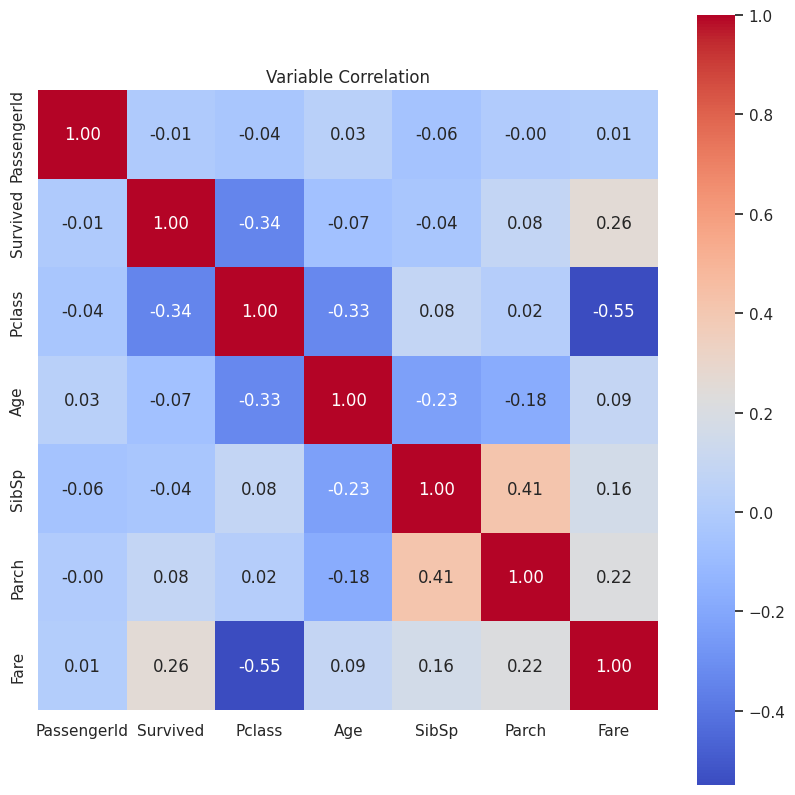

In [ ]:
# show correlation between all features after adding a new one
correlation_matrix = df.corr()
f,ax = plt.subplots(figsize=(10,10))
sns.heatmap(correlation_matrix, square=True, ax=ax, annot=True, cmap='coolwarm', fmt='.2f', annot_kws={'size':12})
plt.title('Variable Correlation')
plt.show()

Predictor variables are not independent of all the other predictor variables.For example, (survived and sex) as in Correlation Test, ( sex and SipSp) are Probably dependent. We can also see from the figure that there is collinearity between many variables.

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
predictors = ["PassengerId", "Survived", "Pclass", "Age", "SibSp", "Parch", "Fare"]
V= df[predictors].values
vif = [variance_inflation_factor(V,i) for i in range(V.shape[1])]
for idx, val in enumerate(vif):
  print(f"VIF for {predictors[idx]}:{val}")

VIF for PassengerId:3.6766246858746907
VIF for Survived:1.6431726900921904
VIF for Pclass:4.638648404956821
VIF for Age:4.363631901302081
VIF for SibSp:1.5669751474420779
VIF for Parch:1.5584590076555962
VIF for Fare:1.872085189893883


## <font color="FF6600"> Data modeling, prediction and solving </font>

Both classification and regression tasks are involved, aiming to establish a connection between the outcome (Survived or not) and various variables or features (Gender, Age, Port, etc.). This falls under the category of supervised learning, where the model is trained using a provided dataset. Considering these two aspects—Supervised Learning and the combination of Classification and Regression—we can narrow down our selection of models to a few candidates. Some of these include:

* Logistic Regression
* KNN (k-Nearest Neighbors)
* Support Vector Machines

In [ ]:
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

In [ ]:
# print categorical variables
s = (df.dtypes == 'object')
catg_col = list(s[s].index)
print('Categorical : ',catg_col)

Categorical :  ['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked']


In [ ]:
# drop cabin column
df.drop('Cabin',axis=1,inplace=True)

# drop name column, ticket column
df.drop(["Name","Ticket"],axis=1,inplace=True)

# drop passenger id
df.drop(["PassengerId"],axis=1,inplace=True)

In [ ]:
# print unique levels for categorical variables
for cat in ['Sex', 'Embarked']:
    print("Levels for catgeory '{0}': {1}".format(cat, df[cat].unique()))

Levels for catgeory 'Sex': ['male' 'female']
Levels for catgeory 'Embarked': ['S' 'C' 'Q']


In [ ]:
# preprocessing, mapping values in Sex and Embarked to 0,1 and 0,1,2
df['Sex'] = df['Sex'].map({'male':0,'female':1})
df['Embarked'] = df['Embarked'].map({'S':0,'C':1,'Q':2})

In [ ]:
# one hot encode Embarked column and drop it from the original ds
encoded_ds = pd.get_dummies(df['Embarked'], prefix='Embarked')
ds_encoded = pd.concat([df, encoded_ds], axis=1)
ds_encoded = ds_encoded.drop('Embarked', axis=1)

# one hot encode Class column and drop it from the original ds
encoded_ds = pd.get_dummies(df['Pclass'], prefix='Pclass')
ds_encoded = pd.concat([df, encoded_ds], axis=1)
ds_encoded = ds_encoded.drop('Pclass', axis=1)

# one hot encode Sex column and drop it from the original ds
encoded_ds = pd.get_dummies(df['Sex'], prefix='Sex')
ds_encoded = pd.concat([df, encoded_ds], axis=1)
ds_encoded = ds_encoded.drop('Sex', axis=1)

In [ ]:
# Splitting the data into features and target variable
X = ds_encoded.drop('Survived', axis=1)  # Features
y = ds_encoded['Survived']  # Target variable

In [ ]:
from sklearn.model_selection import train_test_split

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=True)
y_train.describe()

count    712.000000
mean       0.376404
std        0.484824
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        1.000000
Name: Survived, dtype: float64

#### Supervised Learning

##### Logistic Regression

Useful model to run early in the workflow. Logistic regression measures the relationship between the categorical dependent variable (feature) and one or more independent variables (features) by estimating probabilities using a logistic function, which is the cumulative logistic distribution

In [ ]:
# Logistic Regression

logreg = LogisticRegression()
logreg.fit(X_train, y_train)
Y_pred = logreg.predict(X_test)
acc_log = round(logreg.score(X_train, y_train) * 100, 2)
acc_log

80.2

##### Support Vector Machines

supervised learning models with associated learning algorithms that analyze data used for classification and regression analysis. Given a set of training samples, each marked as belonging to one or the other of two categories, an SVM training algorithm builds a model that assigns new test samples to one category or the other, making it a non-probabilistic binary linear classifier

In [ ]:
# Support Vector Machines

svc = SVC()
svc.fit(X_train, y_train)
Y_pred = svc.predict(X_test)
acc_svc = round(svc.score(X_train, y_train) * 100, 2)
acc_svc

66.99

##### k-Nearest Neighbors algorithm (or k-NN for short)

non-parametric method used for classification and regression. A sample is classified by a majority vote of its neighbors, with the sample being assigned to the class most common among its k nearest neighbors (k is a positive integer, typically small). If k = 1, then the object is simply assigned to the class of that single nearest neighbor.

In [ ]:
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, y_train)
Y_pred = knn.predict(X_test)
acc_knn = round(knn.score(X_train, y_train) * 100, 2)
acc_knn

83.01

## <font color="FF6600"> Fit a linear model and interpret the regression coefficients </font>

In [ ]:
#Statsmodel
import statsmodels.api as sm
model = sm.OLS(
    df["Survived"],
    df[["Pclass", "Age", "Sex", "SibSp", "Parch", "Fare"]]
).fit()

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:               Survived   R-squared (uncentered):                   0.575
Model:                            OLS   Adj. R-squared (uncentered):              0.572
Method:                 Least Squares   F-statistic:                              199.3
Date:                Thu, 14 Dec 2023   Prob (F-statistic):                   1.62e-160
Time:                        21:57:28   Log-Likelihood:                         -456.80
No. Observations:                 891   AIC:                                      925.6
Df Residuals:                     885   BIC:                                      954.4
Df Model:                           6                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Pclass         0.0183      0.011      1.695      0.091      -0.003       0.039
Age            0.0023      0.001      2.812      0.005       0.001       0.004
Sex            0.5800      0.029     19.928      0.000       0.523       0.637
SibSp         -0.0371      0.014     -2.672      0.008      -0.064      -0.010
Parch         -0.0213      0.019     -1.103      0.270      -0.059       0.017
Fare           0.0022      0.000      7.134      0.000       0.002       0.003
==============================================================================
Omnibus:                       41.337   Durbin-Watson:                   1.943
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               45.903
Skew:                           0.546   Prob(JB):                     1.08e-10
Kurtosis:                       3.214   Cond. No.                         136.
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
from sklearn.model_selection import train_test_split

# Spliting data into Training 76.5%, Validation set 13.5% and Test set 10%

X_t, X_test, y_t, y_test = train_test_split(df[["Pclass", "Age", "Sex","SibSp", "Parch", "Fare"]], df["Survived"], test_size=0.1, random_state=1)

X_train, X_val, y_train, y_val = train_test_split(
    X_t, y_t, test_size=0.15, random_state=1
)

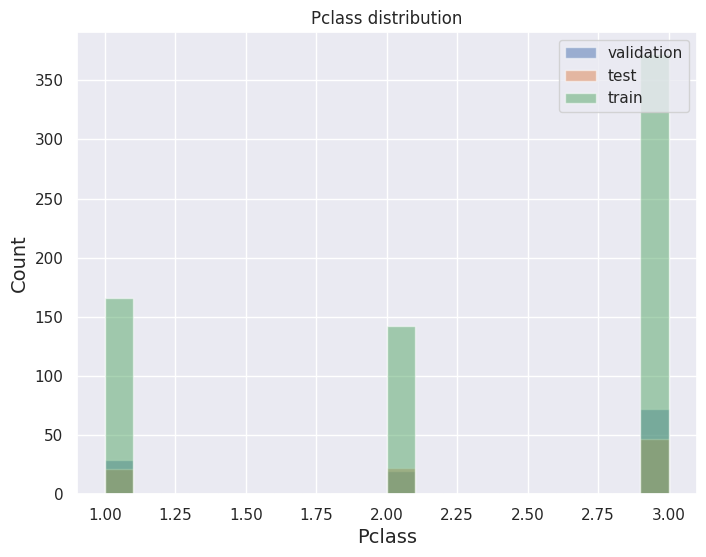

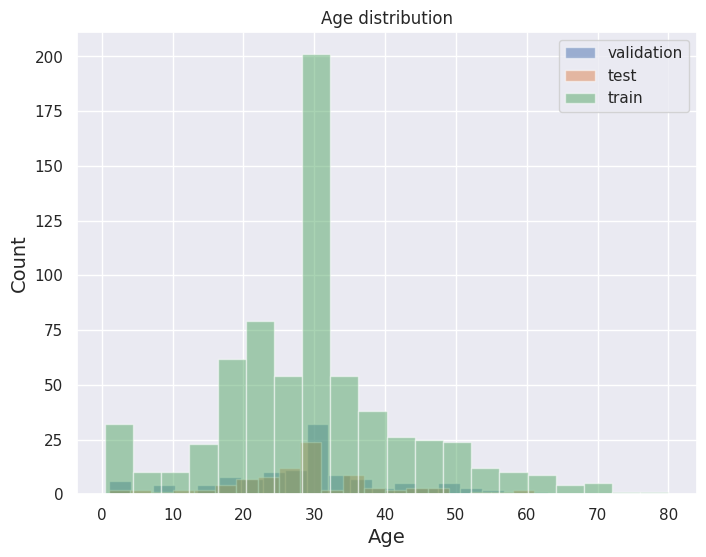

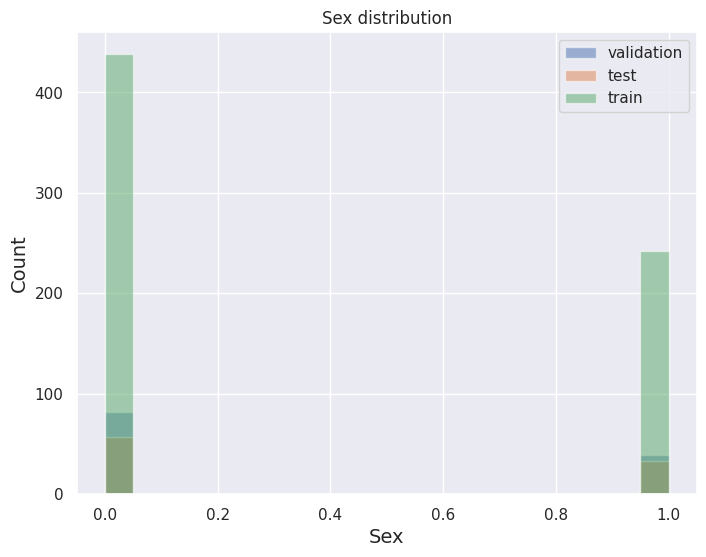

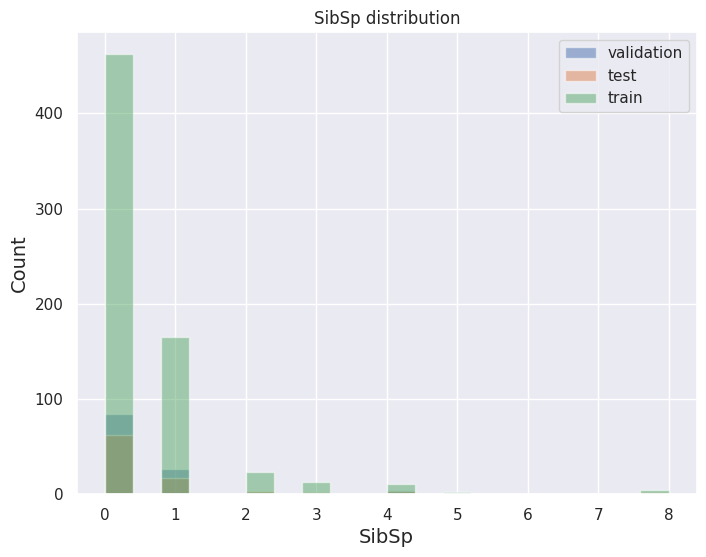

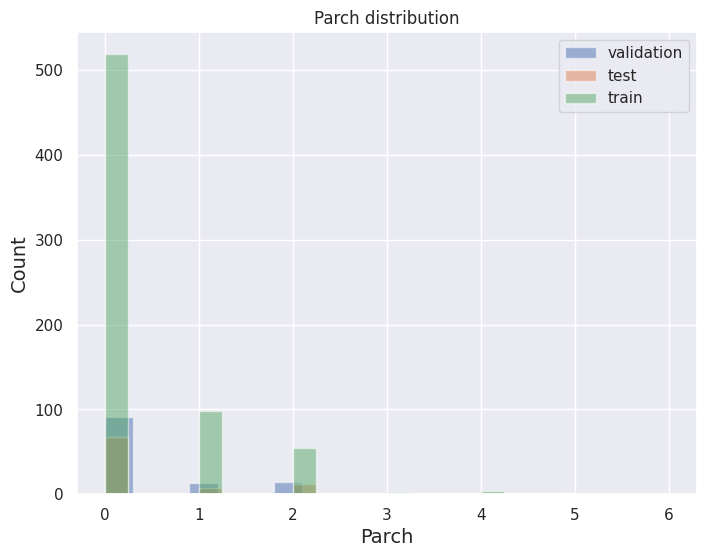

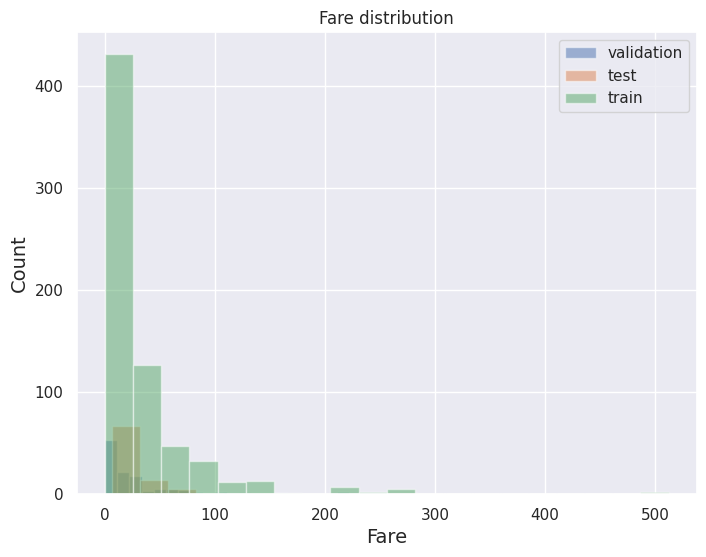

In [ ]:
X_test_plot = X_test[
    [
        "Pclass", "Age", "Sex","SibSp", "Parch", "Fare"
    ]
]

X_val_plot = X_val[
    [
        "Pclass", "Age", "Sex","SibSp", "Parch", "Fare"
    ]
]

X_train_plot = X_train[
    [
        "Pclass", "Age", "Sex","SibSp", "Parch", "Fare"
    ]
]

# Plotting the data to see the histogram
for c in X_test_plot.columns[:]:
    plt.figure(figsize=(8, 6))
    plt.hist(X_val_plot[c], bins=20, alpha=0.5, label="validation")
    plt.hist(X_test_plot[c], bins=20, alpha=0.5, label="test")
    plt.hist(X_train_plot[c], bins=20, alpha=0.5, label="train")
    plt.xlabel(c, size=14)
    plt.ylabel("Count", size=14)
    plt.legend(loc="upper right")
    plt.title("{} distribution".format(c))
    plt.show()

In [ ]:
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn import datasets, linear_model
from sklearn.model_selection import RandomizedSearchCV
from mlxtend.feature_selection import SequentialFeatureSelector as SFS

In [ ]:
# Sequential Forward Selection(sfs)
logistic_regression = LogisticRegression()
logistic_regression.fit(X_train, y_train)
from sklearn.inspection import permutation_importance
results = permutation_importance(logistic_regression, X_train, y_train,scoring = 'accuracy')
importance = results.importances_mean

In [ ]:
#Linear Regression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

linreg = LinearRegression()
linreg.fit(X_train,y_train)
y_pred=(linreg.predict(X_test))

print('R-squared train score: {:.3f}'.format(linreg.score(X_train, y_train)))
print('R-squared test score: {:.3f}'.format(linreg.score(X_test, y_test)))

R-squared train score: 0.409
R-squared test score: 0.350


## <font color="FF6600"> Feature Selection and Classification </font>

**Which predictor variables are the most important?**

In [ ]:
#Feature Selection
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
independent_columns = df[["Pclass", "Age", "Sex", "SibSp", "Parch", "Fare"]]  #independent columns
target_column = df[["Survived"]]    #target column

#apply SelectKBest class to extract top best features
bestfeatures = SelectKBest(score_func=chi2, k=6)
fit = bestfeatures.fit(independent_columns,target_column)
df_scores = pd.DataFrame(fit.scores_)
df_columns = pd.DataFrame(X.columns)

#concat two dataframes for better visualization
featureScores = pd.concat([df_columns,df_scores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
print(featureScores.nlargest(12,'Score'))  #print best features

      Specs        Score
5  Embarked  4518.319091
2     SibSp   170.348127
0    Pclass    30.873699
1       Age    24.687926
4      Fare    10.097499
3     Parch     2.581865
6     Sex_0          NaN
7     Sex_1          NaN


* Embarked_Q (Score: 4518.319091):



This feature, related to the port of embarkation being Queenstown, has a high importance score of 4518.319091 in the model. It suggests that this feature significantly influences the model's predictions.

* Parch (Score: 170.348127):



The "Parch" feature, representing the number of parents or children aboard, has a substantial importance score of 170.348127. This indicates its considerable impact on the model's predictions.

* Age (Score: 30.873699):



The age of passengers (Age) has a moderate importance score of 30.873699. It contributes to the model's predictions but to a lesser extent compared to the previous features.

* SibSp (Score: 21.688248):



"SibSp," which represents the number of siblings or spouses aboard, has a lower importance score of 21.688248. It still plays a role in the model but is less influential than other features.

* Embarked_C (Score: 10.097499):



This feature, related to the port of embarkation being Cherbourg, has a relatively lower importance score of 10.097499. It contributes to the model, but to a lesser degree compared to the more impactful features.

* Fare (Score: 2.581865):



The fare paid by passengers has a modest importance score of 2.581865, suggesting a limited impact on the model's predictions compared to other features.

* 7-11. Embarked_S, Pclass_1, Pclass_2, Pclass_3, Sex_female, Sex_male (Scores: NaN): features were not considered in the model

In [ ]:
#Classification Problem
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import r2_score, mean_squared_error
logisticRegr = LogisticRegression()
logisticRegr.fit(X_train, y_train)
threshold=0.5
logisticRegr.predict(X_test)

array([1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0,
       1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1])

In [ ]:
s1= logisticRegr.predict(X_test)
rms = mean_squared_error(y_test, s1, squared=False)
rms

0.4472135954999579

In [ ]:
from sklearn.metrics import confusion_matrix

cf_matrix = confusion_matrix(y_test, s1)
print(cf_matrix)

[[46  7]
 [11 26]]


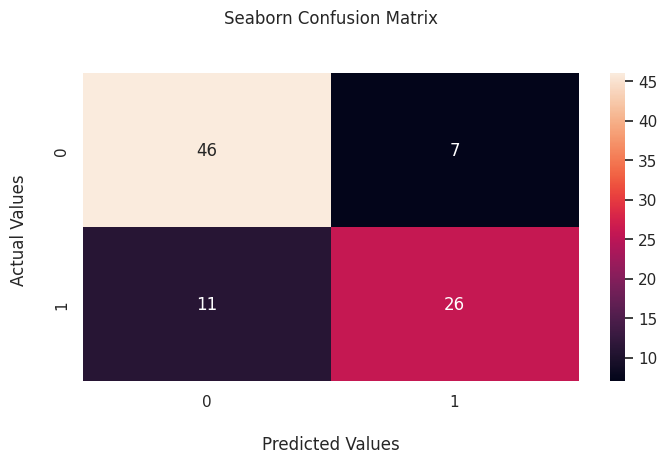

In [ ]:
ax = sns.heatmap(cf_matrix, annot=True)
ax.set_title('Seaborn Confusion Matrix\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values \n');

## Display the visualization of the Confusion Matrix.
plt.show()

### Removing 1%, 5%, and 10% of data randomly and imputing the values back

In [ ]:
# Removing 1% data from dataframe
p = 0.01
mask = np.random.choice([True, False], size = df.shape, p = [p, 1 - p])
df_train_per1 = df.mask(mask)
print(df_train_per1)

# Removing 5% data from dataframe
p = 0.05
mask = np.random.choice([True, False], size = df.shape, p = [p, 1 - p])
df_train_per5= df.mask(mask)
print(df_train_per5)

# Removing 10% data from dataframe
p = 0.1
mask = np.random.choice([True, False], size = df.shape, p = [p, 1 - p])
df_train_per10 = df.mask(mask)
print(df_train_per10)

     Survived  Pclass  Sex        Age  SibSp  Parch     Fare  Embarked
0         0.0     3.0  0.0  22.000000    1.0    0.0   7.2500       0.0
1         1.0     1.0  1.0  38.000000    1.0    0.0  71.2833       1.0
2         1.0     3.0  1.0  26.000000    0.0    0.0   7.9250       0.0
3         1.0     1.0  1.0  35.000000    1.0    0.0  53.1000       0.0
4         0.0     3.0  0.0  35.000000    0.0    0.0   8.0500       0.0
..        ...     ...  ...        ...    ...    ...      ...       ...
886       0.0     2.0  0.0  27.000000    0.0    0.0  13.0000       0.0
887       1.0     1.0  1.0  19.000000    0.0    0.0      NaN       0.0
888       0.0     3.0  1.0  29.699118    1.0    2.0  23.4500       0.0
889       1.0     1.0  0.0  26.000000    0.0    0.0  30.0000       1.0
890       0.0     3.0  0.0  32.000000    0.0    0.0   7.7500       2.0

[891 rows x 8 columns]
     Survived  Pclass  Sex        Age  SibSp  Parch     Fare  Embarked
0         0.0     3.0  0.0  22.000000    1.0    NaN  

In [ ]:
# Checking null null values after removing data from data set
print("One percent missing value: ", "\n", df_train_per1.isnull().sum())
print ("")
print ("Five percent missing value: ", "\n", df_train_per5.isnull().sum())
print ("")
print("Ten percent missing value: ", "\n", df_train_per10.isnull().sum())
print ("")

One percent missing value:  
 Survived    10
Pclass       8
Sex         14
Age          7
SibSp        9
Parch       14
Fare         9
Embarked     8
dtype: int64

Five percent missing value:  
 Survived    43
Pclass      47
Sex         49
Age         43
SibSp       30
Parch       49
Fare        53
Embarked    45
dtype: int64

Ten percent missing value:  
 Survived     92
Pclass       97
Sex         104
Age          99
SibSp        87
Parch        81
Fare         84
Embarked     92
dtype: int64



In [ ]:
from sklearn.impute import SimpleImputer
imp = SimpleImputer(missing_values = np.nan, strategy = 'most_frequent')
result = pd.DataFrame(imp.fit_transform(df_train_per1))
model = sm.OLS(
        result[7],
        result[[0,1,2,3,4,5,6]]
).fit()

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      7   R-squared (uncentered):                   0.279
Model:                            OLS   Adj. R-squared (uncentered):              0.274
Method:                 Least Squares   F-statistic:                              48.95
Date:                Thu, 14 Dec 2023   Prob (F-statistic):                    6.92e-59
Time:                        21:57:32   Log-Likelihood:                         -833.40
No. Observations:                 891   AIC:                                      1681.
Df Residuals:                     884   BIC:                                      1714.
Df Model:                           7                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
0              0.0823      0.051      1.622      0.105      -0.017       0.182
1              0.1077      0.017      6.521      0.000       0.075       0.140
2              0.1556      0.053      2.920      0.004       0.051       0.260
3              0.0007      0.001      0.523      0.601      -0.002       0.003
4             -0.0318      0.021     -1.502      0.134      -0.073       0.010
5             -0.0909      0.030     -3.074      0.002      -0.149      -0.033
6              0.0017      0.000      3.681      0.000       0.001       0.003
==============================================================================
Omnibus:                      211.083   Durbin-Watson:                   2.011
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              377.886
Skew:                           1.492   Prob(JB):                     8.77e-83
Kurtosis:                       4.127   Cond. No.                         195.
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

This dataset doesn't have outliers which are unimportant, as a result, they do form important parts of the **titanic dataset** observations. So no value or test results can be considered as outliers because, they have been performed people Survived

-----------------

From the above imputations on various %ages of data, we can see that in most of the cases, the column numbers 1, 6, 5, 2 have lowest p-values which means they are highly significant in predicting the correct values of the Survived variable. The names of these columns therefore are -   

1         Age    

6    Embarked   

5        Fare   

2         Sex

Hence, we can conclude these values are highly significant for efficient predictions of the target variable.



Removal of random data and imputation did result in some variations but the overall scope of the variables didn't suffer much.

## <font color="FF6600"> AutoML </font>
Automated machine learning (AutoML) is the process of automating the end-to-end process of applying machine learning to real-world problems.

H2O AutoML automates the steps like basic data processing, model training and tuning, Ensemble and stacking of various models to provide the models with the best performance so that developers can focus on other steps like data collection, feature engineering and deployment of model.

We are initializing H2O in the following steps.

In [ ]:
!pip install -f http://h2o-release.s3.amazonaws.com/h2o/latest_stable_Py.html h2o

Looking in links: http://h2o-release.s3.amazonaws.com/h2o/latest_stable_Py.html


In [ ]:
import h2o
from h2o.automl import H2OAutoML
import random, os, sys
import logging
import psutil

In [ ]:
min_mem_size=6
run_time=222

In [ ]:
pct_memory=0.5
virtual_memory=psutil.virtual_memory()
min_mem_size=int(round(int(pct_memory*virtual_memory.available)/1073741824,0))
print(min_mem_size)

6


In [ ]:
port_no=random.randint(5555,55555)

try:
  h2o.init(strict_version_check=False,min_mem_size_GB=min_mem_size,port=port_no) # start h2o
except:
  logging.critical('h2o.init')
  h2o.download_all_logs(dirname=logs_path, filename=logfile)
  h2o.cluster().shutdown()
  sys.exit(2)

Checking whether there is an H2O instance running at http://localhost:16195..... not found.
Attempting to start a local H2O server...
  Java Version: openjdk version "11.0.21" 2023-10-17; OpenJDK Runtime Environment (build 11.0.21+9-post-Ubuntu-0ubuntu122.04); OpenJDK 64-Bit Server VM (build 11.0.21+9-post-Ubuntu-0ubuntu122.04, mixed mode, sharing)
  Starting server from /usr/local/lib/python3.10/dist-packages/h2o/backend/bin/h2o.jar
  Ice root: /tmp/tmpietaxzwp
  JVM stdout: /tmp/tmpietaxzwp/h2o_unknownUser_started_from_python.out
  JVM stderr: /tmp/tmpietaxzwp/h2o_unknownUser_started_from_python.err
  Server is running at http://127.0.0.1:16195
Connecting to H2O server at http://127.0.0.1:16195 ... successful.


H2O_cluster_uptime:,07 secs
H2O_cluster_timezone:,Etc/UTC
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.44.0.2
H2O_cluster_version_age:,1 month and 6 days
H2O_cluster_name:,H2O_from_python_unknownUser_zam3a3
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,6 Gb
H2O_cluster_total_cores:,2
H2O_cluster_allowed_cores:,2
H2O_cluster_status:,"locked, healthy"


In [ ]:
# Import the processed data from notebook One
url = "https://raw.githubusercontent.com/RakshitaJ-Neu/info6105-dataset/main/Titanic-Dataset.csv"
dataframe = h2o.import_file(path = url)
#converting target variable to categorical
dataframe['Survived'] = dataframe['Survived'].asfactor()
dataframe['Sex'] = dataframe['Sex'].asfactor()

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


In [ ]:
dataframe.types

{'PassengerId': 'int',
 'Survived': 'enum',
 'Pclass': 'int',
 'Name': 'string',
 'Sex': 'enum',
 'Age': 'real',
 'SibSp': 'int',
 'Parch': 'int',
 'Ticket': 'int',
 'Fare': 'real',
 'Cabin': 'enum',
 'Embarked': 'enum'}

In [ ]:
dataframe.shape

(891, 12)

In [ ]:
pct_rows=0.80
df_train, df_test = dataframe.split_frame([pct_rows])

print(df_train.shape)
print(df_test.shape)

#Displaying all the column names in the variable X
required_features = ['PassengerId',
 'Survived',
 'Pclass',
 'Name',
 'Sex',
 'Age',
 'SibSp',
 'Parch',
 'Ticket',
 'Fare',
 'Cabin',
 'Embarked']
X=dataframe.columns
print(X)

#Separating Target variable from the independent variables' column
y_target_variable ='Survived'
X.remove(y_target_variable)
print(X)

(711, 12)
(180, 12)
['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked']
['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked']


In [ ]:
aml = H2OAutoML(max_runtime_secs=run_time, seed=1)
aml.train(x=X,y=y_target_variable,training_frame=df_train)

AutoML progress: |
21:58:01.167: _train param, Dropping bad and constant columns: [Name]

████
21:58:14.99: _train param, Dropping bad and constant columns: [Name]

██
21:58:20.297: _train param, Dropping bad and constant columns: [Name]

█
21:58:24.688: _train param, Dropping unused columns: [Name]
21:58:25.568: _train param, Dropping bad and constant columns: [Name]

███
21:58:35.940: _train param, Dropping bad and constant columns: [Name]

██
21:58:44.16: _train param, Dropping bad and constant columns: [Name]

██
21:58:49.940: _train param, Dropping bad and constant columns: [Name]

█
21:58:54.513: _train param, Dropping bad and constant columns: [Name]

██
21:58:59.319: _train param, Dropping unused columns: [Name]


21:59:00.326: _train param, Dropping unused columns: [Name]


21:59:01.384: _train param, Dropping bad and constant columns: [Name]

██
21:59:08.273: _train param, Dropping bad and constant columns: [Name]

███
21:59:16.344: _train param, Dropping bad and constant col

key,value
Stacking strategy,cross_validation
Number of base models (used / total),5/6
# GBM base models (used / total),1/1
# XGBoost base models (used / total),1/1
# DRF base models (used / total),1/2
# GLM base models (used / total),1/1
# DeepLearning base models (used / total),1/1
Metalearner algorithm,GLM
Metalearner fold assignment scheme,Random
Metalearner nfolds,5


In [ ]:
print(aml.leaderboard)

model_id                                                      auc    logloss     aucpr    mean_per_class_error      rmse       mse
StackedEnsemble_BestOfFamily_4_AutoML_1_20231214_215800  0.87847    0.412984  0.851093                0.188438  0.358494  0.128518
StackedEnsemble_BestOfFamily_3_AutoML_1_20231214_215800  0.875424   0.419652  0.844739                0.191769  0.361418  0.130623
StackedEnsemble_AllModels_2_AutoML_1_20231214_215800     0.873885   0.420795  0.843733                0.188298  0.361413  0.130619
StackedEnsemble_BestOfFamily_2_AutoML_1_20231214_215800  0.87297    0.423249  0.843694                0.189531  0.363812  0.132359
GBM_grid_1_AutoML_1_20231214_215800_model_12             0.872453   0.422834  0.844515                0.187064  0.363811  0.132358
StackedEnsemble_AllModels_1_AutoML_1_20231214_215800     0.872308   0.424407  0.842515                0.191856  0.36427   0.132692
GBM_grid_1_AutoML_1_20231214_215800_model_2              0.871857   0.424976  0.845

**Relation between Variables**

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
#Indicate which variables to compute VIF
Multic = dataset[['PassengerId',
 'Pclass',
 'Age',
 'SibSp',
 'Parch',
 'Fare']]
Multic = Multic.dropna()
#Compute VIF

for column in Multic.columns:
    Multic[column] = pd.to_numeric(Multic[column], errors='coerce')

vif = pd.DataFrame()
vif["variables"] = Multic.columns
vif["VIF"] = [variance_inflation_factor(Multic.values, i) for i in range(Multic.shape[1])]
vif

,variables,VIF
0,PassengerId,3.609810
1,Pclass,4.315488
2,Age,3.778670
3,SibSp,1.621468
4,Parch,1.544397
5,Fare,1.725352


In [ ]:
import statsmodels.formula.api as smf #OLS model Library
results = smf.ols('Survived ~ PassengerId + Pclass + Age + SibSp + Parch + Fare', data=dataset).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               Survived   R-squared:                       0.195
Model:                            OLS   Adj. R-squared:                  0.188
Method:                 Least Squares   F-statistic:                     28.54
Date:                Thu, 14 Dec 2023   Prob (F-statistic):           1.23e-30
Time:                        22:17:13   Log-Likelihood:                -427.98
No. Observations:                 714   AIC:                             870.0
Df Residuals:                     707   BIC:                             902.0
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       1.1796      0.094     12.519      0.000       0.995       1.365
PassengerId  2.959e-05   6.43e-05      0.461      0.645   -9.66e-05       0.000
Pclass         -0.2429      0.026     -9.397      0.000      -0.294      -0.192
Age            -0.0086      0.001     -6.610      0.000      -0.011      -0.006
SibSp          -0.0567      0.020     -2.810      0.005      -0.096      -0.017
Parch           0.0490      0.022      2.273      0.023       0.007       0.091
Fare            0.0006      0.000      1.418      0.157      -0.000       0.001
==============================================================================
Omnibus:                      209.321   Durbin-Watson:                   1.920
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               47.347
Skew:                           0.348   Prob(JB):                     5.23e-11
Kurtosis:                       1.947   Cond. No.                     3.03e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.03e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
#Dopping the unecessary features as discussed above
dataset=dataset.drop(['Name', 'Cabin', 'Ticket'], axis=1)
dataset

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,male,22.0,1,0,7.2500,S
1,2,1,1,female,38.0,1,0,71.2833,C
2,3,1,3,female,26.0,0,0,7.9250,S
3,4,1,1,female,35.0,1,0,53.1000,S
4,5,0,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...,...
886,887,0,2,male,27.0,0,0,13.0000,S
887,888,1,1,female,19.0,0,0,30.0000,S
888,889,0,3,female,NaN,1,2,23.4500,S
889,890,1,1,male,26.0,0,0,30.0000,C


In [ ]:
# preprocessing, mapping values in Sex and Embarked to 0,1 and 0,1,2
dataset['Sex'] = dataset['Sex'].map({'male':0,'female':1})
dataset['Embarked'] = dataset['Embarked'].map({'S':0,'C':1,'Q':2})

In [ ]:
X_test['Sex'] = X_test['Sex'].astype('category')

In [ ]:
dataset.corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


Text(0.5, 1.0, 'Variable Correlation')

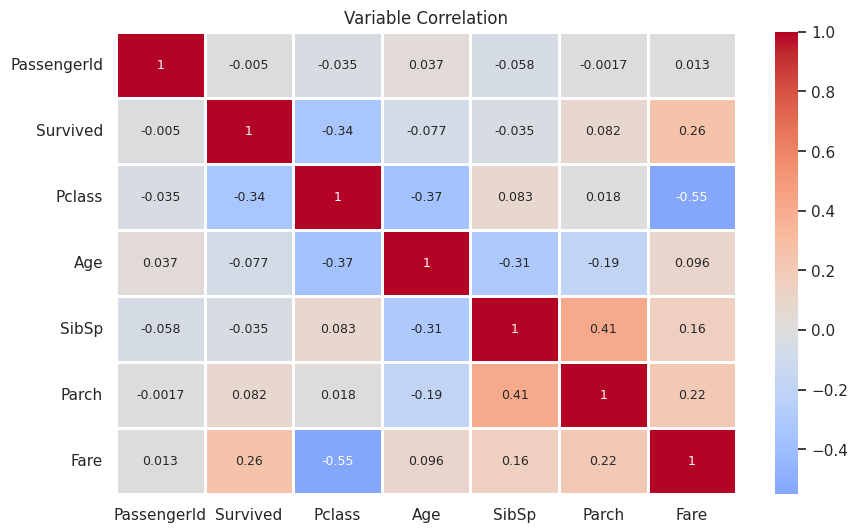

In [ ]:
#Representing Matrix as a plot
from IPython.core.pylabtools import figsize
f,ax=plt.subplots(figsize=(10,6))

sns.heatmap(dataset.corr(),center=0, linewidths=0.8,cmap='coolwarm',annot=True, annot_kws={"size": 9})
plt.title('Variable Correlation')

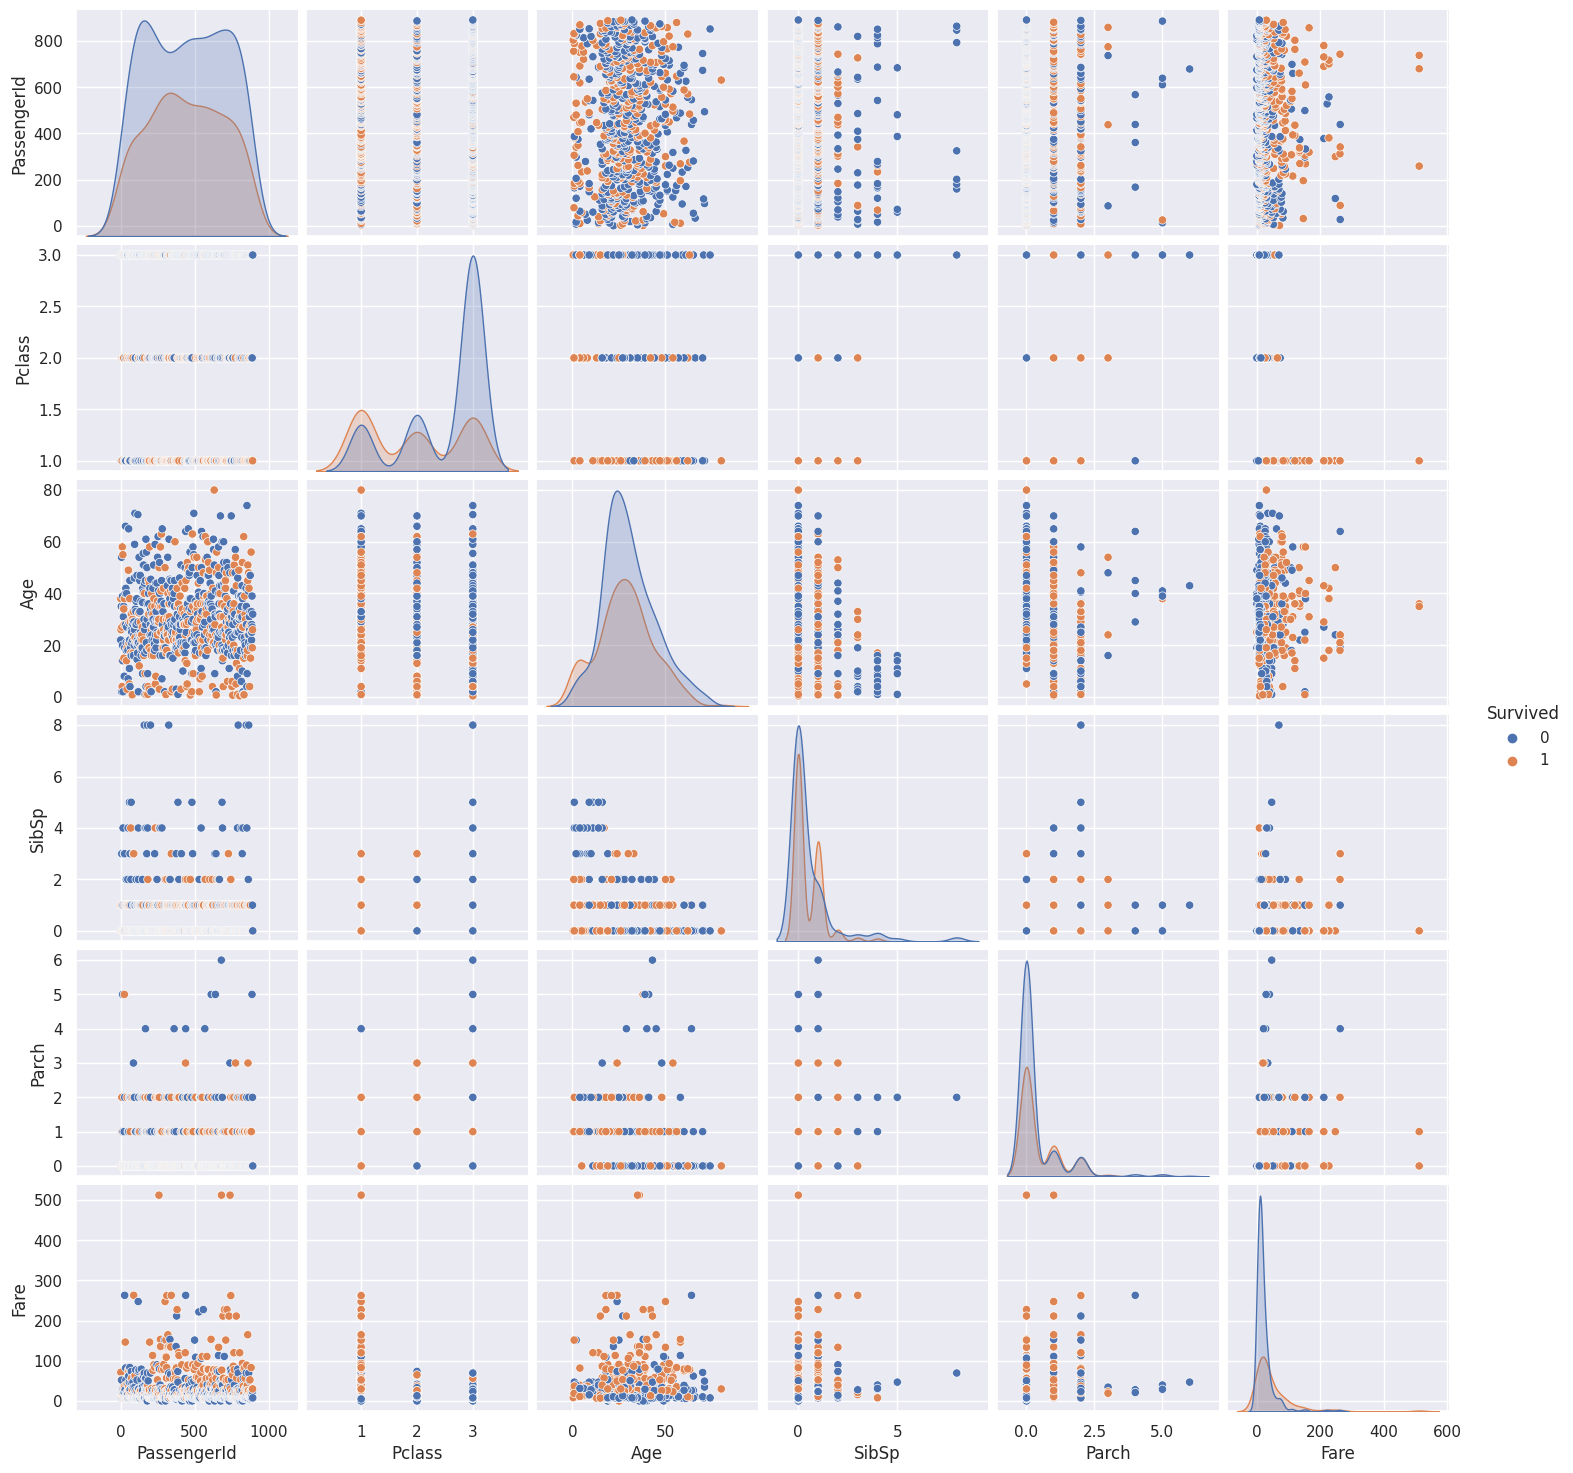

In [ ]:
sns.pairplot(dataset, hue= 'Survived')

In [ ]:
# Assign index values to all the models generated
model_index=0
glm_index=0
glm_model=''
aml_leaderboard_df=aml.leaderboard.as_data_frame()
models_dict={}
for m in aml_leaderboard_df['model_id']:
  models_dict[m]=model_index
  if 'StackedEnsemble' not in m:
    break
  model_index=model_index+1

for m in aml_leaderboard_df['model_id']:
  if 'GLM' in m:
    models_dict[m]=glm_index
    break
  glm_index=glm_index+1
models_dict

{'StackedEnsemble_BestOfFamily_4_AutoML_1_20231214_215800': 0,
 'StackedEnsemble_BestOfFamily_3_AutoML_1_20231214_215800': 1,
 'StackedEnsemble_AllModels_2_AutoML_1_20231214_215800': 2,
 'StackedEnsemble_BestOfFamily_2_AutoML_1_20231214_215800': 3,
 'GBM_grid_1_AutoML_1_20231214_215800_model_12': 4,
 'GLM_1_AutoML_1_20231214_215800': 34}

In [ ]:
# Print the index value of best model
print(model_index)
best_model = h2o.get_model(aml.leaderboard[model_index,'model_id'])

4


In [ ]:
best_model.algo

'gbm'

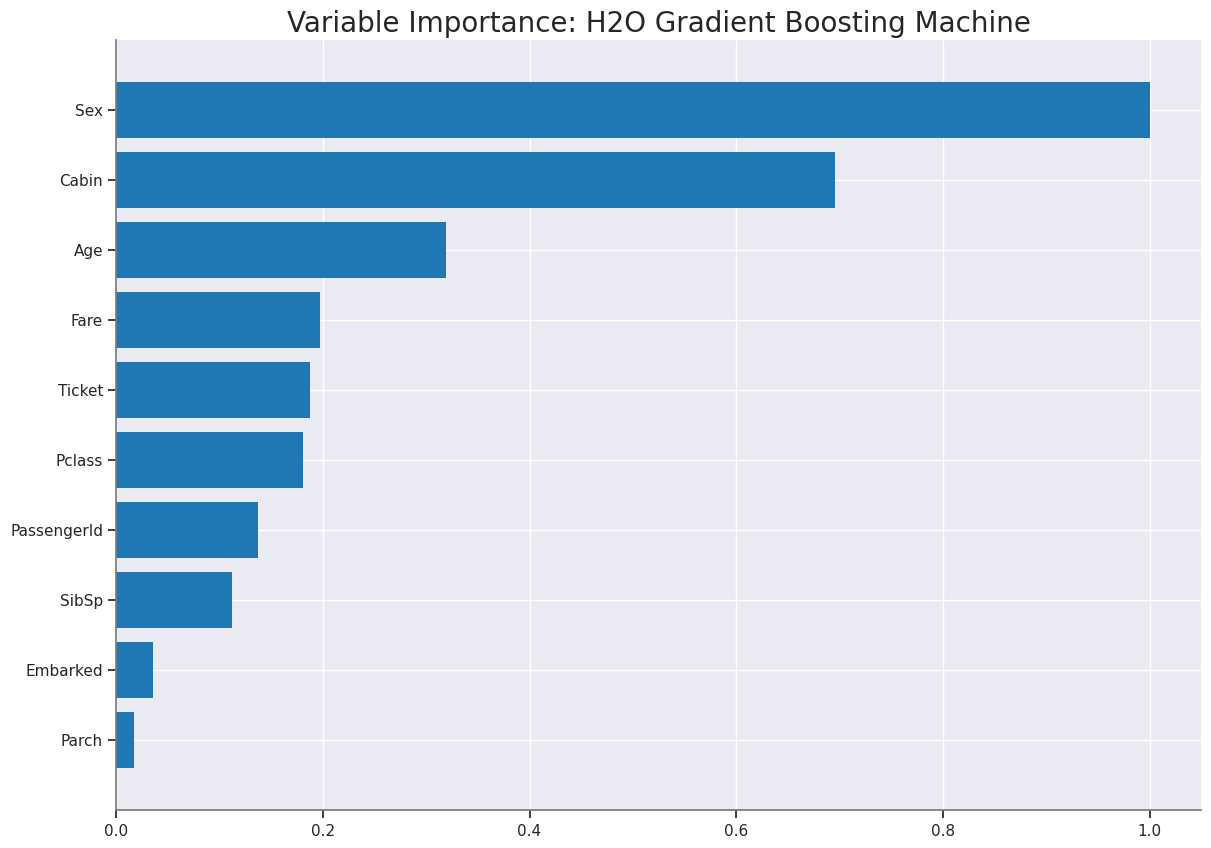

<Figure size 800x400 with 0 Axes>

In [ ]:
# Plot variables in order of their importance for price prediction
if best_model.algo in ['deeplearning','gbm','drf','xrt','xgboost', 'glm']:
    best_model.varimp_plot()

***CONCLUSION***



H2O is an open-source software designed for data modeling and analysis, serving as a tool for constructing machine learning models. It provides support for an array of machine learning algorithms, encompassing deep learning, gradient boosting, and generalized linear models.



To initiate the H2O AutoML process, I configured the maximum runtime and utilized the Psutil library to gather virtual memory information, determining a minimum required memory size. Subsequently, the H2O server is launched on a randomly assigned port, and the Pandas data frame is converted into an H2O data frame. An 80/20 train/test split is created, and the AutoML setup is initialized.



The autoML function takes the training and testing datasets, specifying the predictors and target variables. It proceeds to train the dataset using various models through the H2OAutoML algorithm. Following this, the getBestModel function is employed to retrieve the top-performing model from the AutoML leaderboard. This function obtains the model index, identifies the GLM model index, and returns the best model

### <font color="FF6600"> **Model Interpretability** </font>

In [ ]:
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import pandas as pd
!pip install shap
import shap
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OrdinalEncoder, StandardScaler, OneHotEncoder
from sklearn_pandas import DataFrameMapper
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
import statsmodels.api as sm
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
data_features = dataset[['PassengerId','Pclass','Age','Sex', 'SibSp', 'Parch','Fare','Embarked']]
# setting up a preprocessing pipeline using linear regression
X_train, X_test, y_train, y_test = train_test_split(data_features, dataset['Survived'], test_size=0.1, shuffle=False) #revert
#  define lists of categorical features based on the columns in X_train
catagorical_features = ['Sex','SibSp']
numerical_features = [c for c in X_train.columns if c not in catagorical_features]

# set up lists (cat and num) of tuples where each tuple contains a feature and a list of transformers to be applied to that feature
# For categorical features, use SimpleImputer to fill missing values with 0 and OrdinalEncoder to encode them
# For numerical features, use SimpleImputer to fill missing values and StandardScaler to standardize the features

cat = [([c], [SimpleImputer(strategy='constant', fill_value=0),
              OrdinalEncoder()]) for c in catagorical_features]
num= [([n], [SimpleImputer(), StandardScaler()]) for n in numerical_features if X_train[n].dtype in ['int64', 'float64']]
mapper = DataFrameMapper(num + cat, df_out=True)
reg = LinearRegression()
pipeline = Pipeline([
    ('preprocess', mapper),
    ('reg', reg)
])
p = pipeline.fit(X_train, y_train)

In [ ]:
# DataFrame with one row and columns corresponding to the union of the provided lists of categorical and numerical features
# All the cells in the DataFrame will contain NaN values
nan_frame = pd.DataFrame(columns=catagorical_features+numerical_features, index=[0])
nan_frame

,Sex,SibSp,PassengerId,Pclass,Age,Parch,Fare,Embarked
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
base_value = round(pipeline.predict(nan_frame)[0], 3)
print(f"Expected value of the output (base value): {base_value}")

Expected value of the output (base value): 0.224


In [ ]:
X_test.iloc[0: 1]

,PassengerId,Pclass,Age,Sex,SibSp,Parch,Fare,Embarked
801,802,2,31.0,1,1,1,26.25,0.0


In [ ]:
from collections import defaultdict

In [ ]:
sample_prediction = round(pipeline.predict(X_test.iloc[0: 1])[0], 3)
print(f"Current Prediction: {sample_prediction}, Actual value: {y_target_variable[0]}")

Current Prediction: 0.723, Actual value: S


**How did we get from 0.449 to 0.224?**

* Find this by adjusting individual feature values. But this can be hard to look at
* Fast way to visualize is with Partial Dependency Plots (which uses Shap values for individual samples)
* Shap values assign a contributing factor to every feature of every sample

### Partial Dependence Plots



In [ ]:
import shap

In [ ]:
explainer = shap.Explainer(pipeline.predict, X_train)
shap_values = explainer(X_test.astype(float))

ExactExplainer explainer: 91it [00:17,  3.57it/s]


In [ ]:
#  partial dependence plots using the SHAP to help visualize the effect of a single feature on the model's predictions while holding other features constant
def partial_dependence_plot(feature, idx=None):
    if idx is None: # visualize all samples
        shap.plots.partial_dependence(
            feature,
            pipeline.predict,
            X_train,
            ice=False,
            model_expected_value=True,
            feature_expected_value=True)
    else: # visualize sample idx
        shap.partial_dependence_plot(
            feature,
            pipeline.predict,
            X_train,
            ice=False,
            model_expected_value=True,
            feature_expected_value=True,
            shap_values=shap_values[idx:idx+1,:])

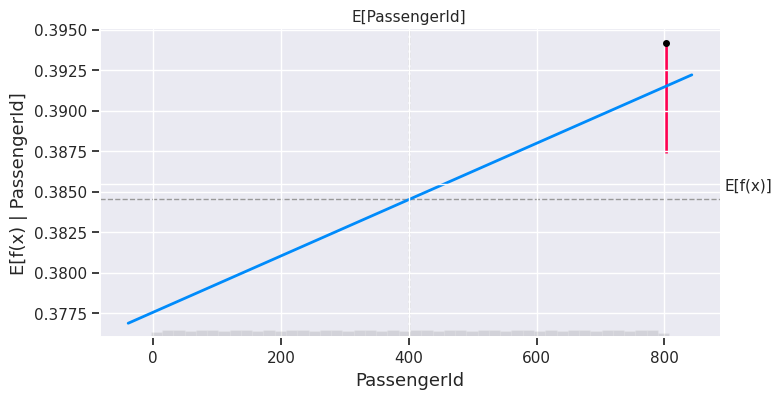

In [ ]:
partial_dependence_plot('PassengerId', 0)

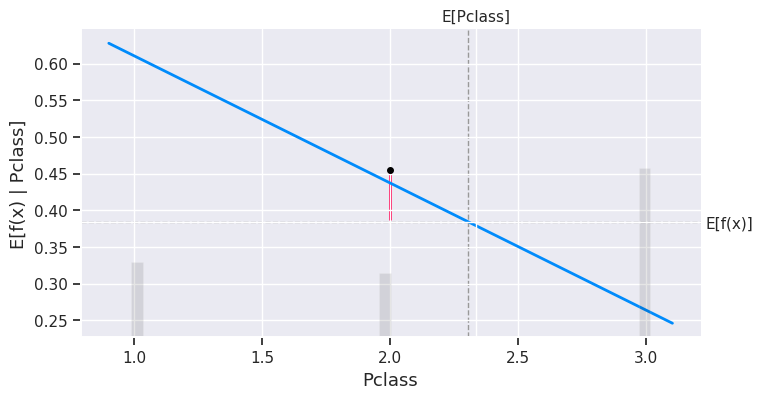

In [ ]:
partial_dependence_plot('Pclass', 0)

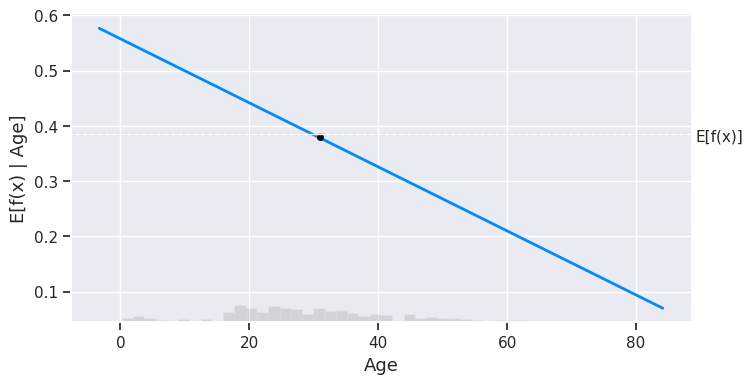

In [ ]:
partial_dependence_plot('Age', 0)

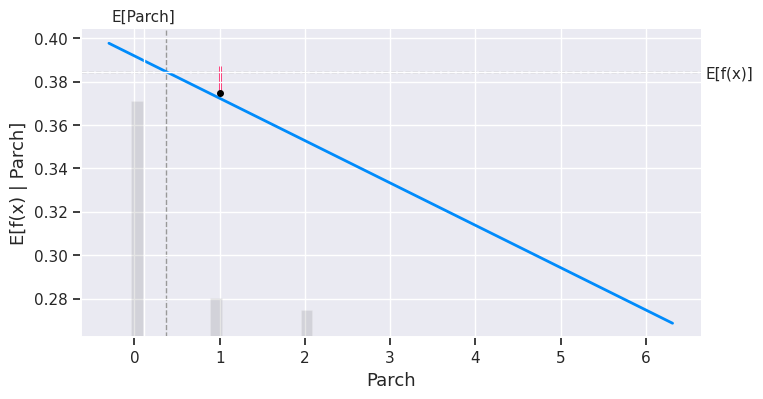

In [ ]:
partial_dependence_plot('Parch', 0)

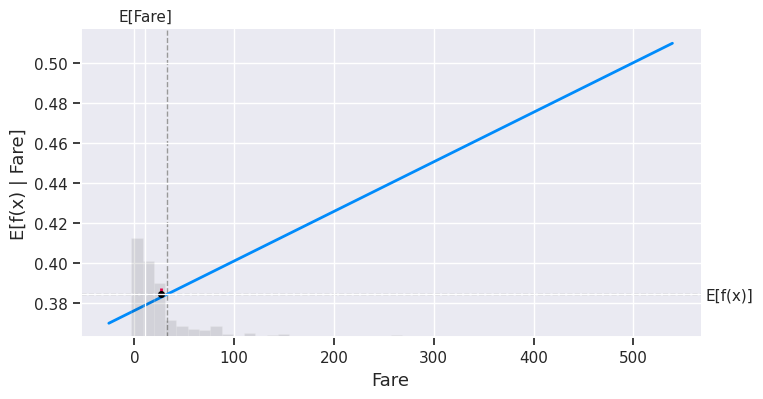

In [ ]:
partial_dependence_plot('Fare', 0)

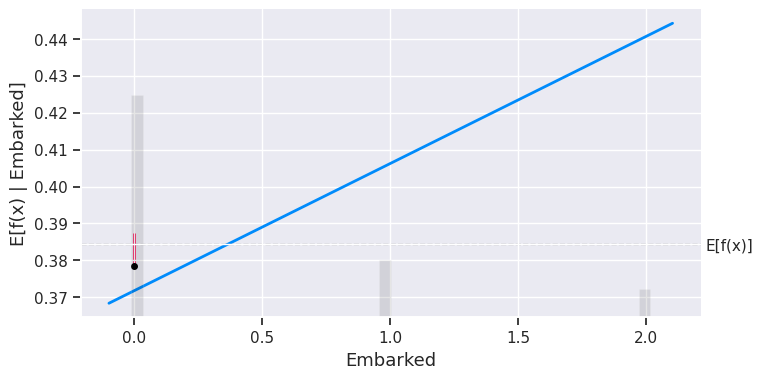

In [ ]:
partial_dependence_plot('Embarked', 0)

### Shap Plots
Hard to look at every feature for every sample. So lets look at all features of the same sample

In [ ]:
# initialize the JavaScript code needed to render the SHAP plots in notebook
shap.initjs()

In [ ]:
# generate SHAP visualizations for feature importance for a specific data sample identified by its index (idx)
# Condensed Force Plot (type='condensed'): Uses shap.plots.force to create a condensed force plot for the specified sample. Condensed force plots visually represent the impact of each feature on the model's prediction for a given instance.
# Waterfall Plot (type='waterfall'):Uses shap.plots.waterfall to generate a waterfall plot for the specified sample. Waterfall plots illustrate the step-by-step contribution of each feature to the final model prediction for an instance.
def sample_feature_importance(idx, type='condensed'):
    if type == 'condensed':
        return shap.plots.force(shap_values[idx])
    elif type == 'waterfall':
        return shap.plots.waterfall(shap_values[idx])
    else:
        return "Return valid visual ('condensed', 'waterfall')"

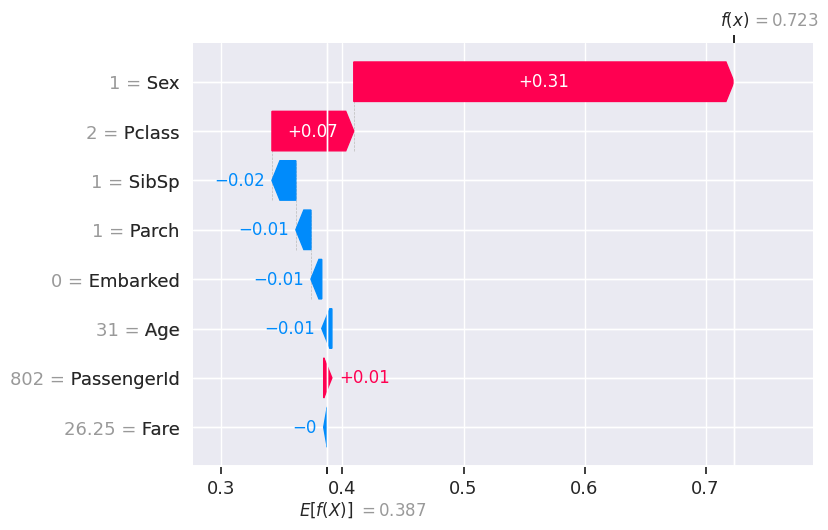

In [ ]:
sample_feature_importance(0, 'waterfall')

In [ ]:
sample_feature_importance(0, 'condensed')

### Feature Importance for model
Looking at individual samples can be a bother. Let's look at all samples together

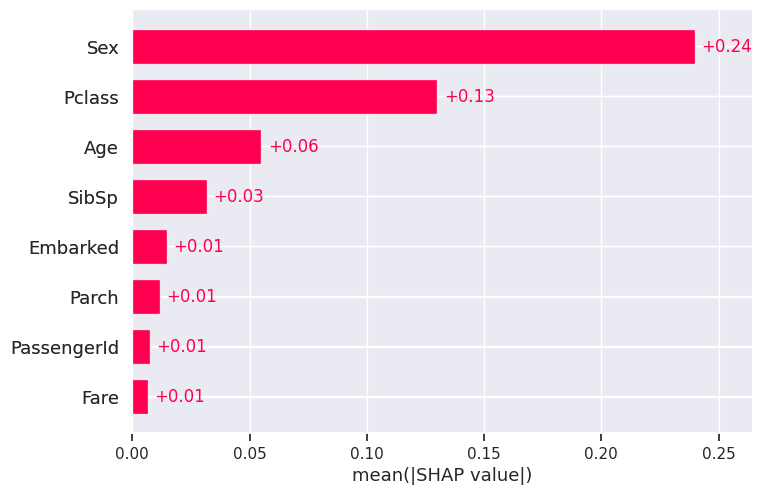

In [ ]:
# plot SHAP values to give a concise overview of the relative importance of different features in influencing the model's output
shap.plots.bar(shap_values)

Two most important features according to the LinearRegression model:

* Sex
* Pclass

A SHAP (SHapley Additive exPlanations) value of 0.1 for the "thal" feature in the model signifies that, on average, the presence of this feature contributes positively to the model's output, and its specific contribution is 0.1 units.

Here's a more detailed breakdown:

Positive Contribution (0.1): A positive SHAP value indicates that the existence of the feature has a positive impact on the model's output for the given instance. Essentially, the model's prediction for that instance is higher than the expected prediction (the mean prediction) due to the influence of this particular feature.

Magnitude (0.1): The magnitude of the SHAP value (0.1) reflects the strength of the contribution. In this instance, the contribution is moderately positive, influencing the model's output by 0.1 units.

Relative to Mean Prediction: SHAP values are typically interpreted in relation to the mean prediction. For example, a SHAP value of 0.1 implies that, on average, the presence of this feature leads to a prediction that is 0.1 units higher than the mean prediction.

Directionality: If the SHAP value were negative (-0.1), it would indicate a negative contribution, suggesting that the presence of the feature leads to a prediction 0.1 units lower than the mean prediction.

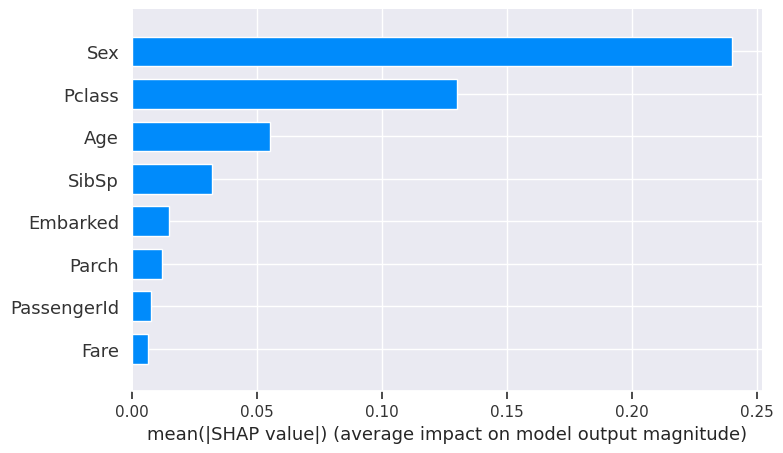

In [ ]:
# generate a summary bar plot of feature importance using SHAP values for the given shap_values and input dataset X_train.
# The resulting plot provides insights into which features have the most significant impact on the model's predictions.
shap.summary_plot(shap_values.values, X_train, plot_type='bar')

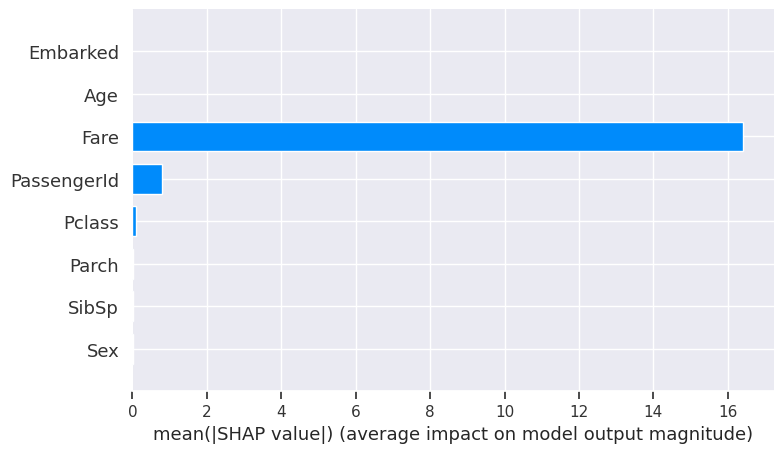

In [ ]:
explainer = shap.Explainer(reg, X_train.astype(float))
shap_values = explainer.shap_values(X_train.astype(float))
shap.summary_plot(shap_values, X_test, plot_type='bar')

**Fare is the most contributing factor**

***CONCLUSION***



I conducted a **SHAP analysis** on a linear regression model, breaking down the code into three main sections:



* **Creating a SHAP explainer object**: The initial step involves establishing a SHAP explainer object, accomplished by employing the LinearExplainer() function from the SHAP library. This object is configured with the linear regression model, lrmodel, and the input data, X.



* **Computing the SHAP values**: Subsequently, I calculated the SHAP values for the first ten instances in the dataset using the shap_values() function associated with the explainer object. These SHAP values constitute a matrix of feature importance scores, delineating the significance of each input feature for every instance.



* **Visualizing the SHAP values**: Lastly, I visualized the SHAP values utilizing the summary_plot() function from the SHAP library. This function generates a summary plot that illustrates the feature importance scores for each input feature pertaining to the chosen instances. The horizontal axis depicts the magnitude of the SHAP value, while the color signifies the value of the corresponding input feature.



* Finally, **the summary plot of SHAP values** for the entire testing set is visualized using shap.summary_plot(shap_values, X_test, plot_type=’bar’). This method generates a bar plot that shows the impact of each feature on the model’s predictions across all passengers in the testing set. The features are sorted in descending order of their importance, with the most important features at the top of the plot.

## **Questions answered**

1.  <font color="yellow"> What is the question? <font color="yellow">

> Combining data cleaning, feature selection, modeling, and interpretability is a vital and iterative procedure in the realm of data analysis and machine learning. Data cleaning encompasses addressing missing values, outliers, and inconsistencies to assure the dataset's quality and dependability. Feature selection aids in pinpointing the most pertinent variables that significantly contribute to the predictive model's performance, thereby reducing dimensionality and improving computational efficiency. During the modeling phase, the selection of a suitable algorithm or model is pivotal for training and evaluating using the refined dataset and chosen features. Ultimately, interpretability techniques offer insights into comprehending the decision-making process of the model, fostering trust, transparency, and potential enhancements. By amalgamating these stages, practitioners can elevate the precision, effectiveness, and interpretability of their models, empowering them to make well-informed and dependable decisions based on the scrutinized data.

2.  <font color="yellow"> What did you do? </font>

* Identified the target variable as 'Survived', examining whether passenger survived Titanic shipwreck or not.

* Examined the composition and layout of the dataset, comprising 891 entries, featuring 2 float and 5 int, total 7 numerical and 5 categorical attributes.

* Detected missing values in 12 dataset columns and applied simple imputation techniques to handle them.

* Conducted one-hot encoding on categorical variables to ready the dataset for modeling purposes.

* Assessed the potential presence of correlations or multicollinearity among predictor variables in the dataset.

* Explored the data distribution across diverse columns in the dataset.

* Examined various modeling approaches, including linear regression, Supervised learning techniques like Logistic Regression, SVM and kNN algorithm, to forecast the target variable, comparing their respective performances.

* Noted that model efficacy could be enhanced through outlier removal, and assessed diverse methods for detecting and eliminating outliers.

* Investigated model interpretability using SHAP analysis to comprehend relationships between distinct variables in the dataset.

3.  <font color="yellow"> How well did it work? </font>

> Successfully aimed to address and seek solutions for the following inquiries:

* Identification of the target variable in the dataset and an exploration of its significance.

* Determination of the most influential features for predicting the target variable.

* Evaluation of optimal models for predicting the target variable, with a focus on performance for this specific dataset.

* Examination of the dataset's size, structure, and content.

* Assessment of the dataset's completeness, including the identification of any missing values that necessitate imputation.

* If there are missing values, exploration of the most effective methods for imputing the data.

* Analysis of the distribution of data across various columns in the dataset.

* Evaluation of algorithms or data models to identify the most effective approach for the flight delay dataset.

* Investigation into whether model performance is enhanced through outlier removal, and if so, determination of the optimal method for outlier identification and removal.

* Assessment of the interpretability of the data and exploration of how SHAP (Shapley Additive exPlanations) can be employed to comprehend relationships between different variables in the dataset.

* Examination of potential correlations or multicollinearity issues among predictor variables in the dataset.

## Learnings & Outcomes

4.  <font color="yellow"> What did you learn? </font>

* **Comprehending the target variable** holds significance in pinpointing the most pertinent predictors and constructing a proficient predictive model. The efficacy of various models is contingent upon the distinct characteristics of the dataset and the objectives of the modeling process.

* **Dealing with missing data** through data imputation techniques is crucial, and the selection of the imputation method should be made judiciously, taking into account the data's attributes and the modeling objectives.



* **Utilizing data visualization** and exploratory analysis methods aids in grasping the dataset's structure and distribution, influencing the choice of modeling techniques and preprocessing procedures.



* **For understanding the relationships between variables** and their contributions to model predictions, techniques such as SHAP analysis can enhance model interpretability.



* **Identifying and rectifying issues like multicollinearity and outliers** can significantly enhance the performance of predictive models.

## LICENSE
MIT License

Copyright (c) 2023 Rakshita Jaiswal

Permission is hereby granted, free of charge, to any person obtaining a copy of this software and associated documentation files (the "Software"), to deal in the Software without restriction, including without limitation the rights to use, copy, modify, merge, publish, distribute, sublicense, and/or sell copies of the Software, and to permit persons to whom the Software is furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY, FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE SOFTWARE.

## REFERENCES

* Dataset- https://www.kaggle.com/datasets/yasserh/titanic-dataset

* H20.ai- https://docs.h2o.ai/

* OLS Model- http://net-informations.com/ds/mla/ols.html

* Notebooks:

  https://github.com/ajhalthor/model-interpretability/blob/main/Shap%20Values.ipynb,

  https://www.kaggle.com/code/thunder7/h2o-auto-ml-titanic,

  https://towardsdatascience.com/using-model-interpretation-with-shap-to-understand-what-happened-in-the-titanic-1dd42ef41888, https://www.kaggle.com/sinakhorami/titanic/titanic-best-working-classifier

  https://www.kaggle.com/c/titanic/details/getting-started-with-random-forests,

  https://www.kaggle.com/sinakhorami/titanic/titanic-best-working-classifier,

  https://github.com/aiskunks/YouTube/blob/main/A_Crash_Course_in_Statistical_Learning/ML_Data_Cleaning_and_Feature_Selection/ML_Data_Cleaning_and_Feature_Selection_Abalone.ipynb

* Professor's AutoML Notebook- https://github.com/nikbearbrown/AI_Research_Group/tree/main/Kaggle_Datasets/AutoML, https://github.com/nikbearbrown/INFO_6105_Data_Science_Engineering_Methods/blob/sorting_branch/Assignment_1/